In [ ]:
#Task--1

import pandas as pd
import re
import string

df = pd.read_csv(r"AppInvData-Clean.csv", sep="`")
fp = open('unique_app_names.csv', 'w', encoding="utf-8")
x = df ['ApplicationName'].unique().tolist()

#df = pd.read_csv('uniq_app_names.txt', header=None)
#x = df[0].tolist()

ascii_special_chars = re.escape(string.punctuation)  # Escapes ASCII special characters
# Adding Unicode punctuation, explicitly including full-width parentheses and colon
unicode_punctuation = r'\u3000-\u303f\u2000-\u206f\uff1a\uff08\uff09'  # Unicode punctuation + full-width colon and parentheses

# Combine ASCII and Unicode punctuation
special_chars = ascii_special_chars + unicode_punctuation

# Escapes digits
digits = re.escape(string.digits)

# Regular expression patterns
chinese_korean_japanese_chars = r'[\u4e00-\u9fff\uac00-\ud7af\u3040-\u30ff]'  # Chinese, Korean, Japanese (Hiragana, Katakana, Kanji)
english_chars = r'[a-zA-Z]'  # English characters


# Special words like version, 32-bit, 64-bit, x64, x32, beta
#check_patterns = r'version|32-bit|64-bit|x64|x32|beta|versione|version2|fullversion|versions|trainingversion|oldwindowsversions|\(free_version\)|version[\s._09]*|version_|versionsua|versionsua[\W]*|netzversion|versioned|specialversion|bbeta|bversion|bsubversion'
#check_patterns = r'version(?:e|s|2|_.*)?'
check_patterns = (
    r'\b(?:version|32-bit|64-bit|x64|x32|bit|bits|beta|versione|version2|fullversion|'
    r'versions|trainingversion|oldwindowsversions|\(free_version\)|'
    r'version[\s._09]*|version_|versionsua|versionsua[\W]*|netzversion|'
    r'versioned|specialversion|bbeta|bversion|bsubversion|subversion|'
    r'versionneuse|fwversion|versiones|subversion x|betaversion|'
    r'subversion r|simversion v|non versioned|specialversion)\b'
)

# Function to remove quotes at the beginning and end of the text
def remove_quotes(text):
    text = text.strip()                                      # First, remove any leading/trailing spaces
    if text.startswith('"') and text.endswith('"'):
        return text[1:-1]
    return text

clean_data = []

for i in x:

#1. Task -convert app names to all lower case
    i = str(i).lower()
    #print(i)                                                 # Print the lowercase result

#3.Task - Remove all special characters and digits regardless of the language
    i1 = re.sub(f'[{special_chars}]', ' ', i)                 # Replace special characters with space
    i2 = re.sub(f'[{digits}]', ' ', i1)                       # Replace digits with space
    #print(i2)                                                # Print result after removing special characters & digits by replacing with space

#4.Task - Check if the string contains only English characters or both english and chinese/korean then remove chinese/korean
    if re.search(english_chars, i2):
        my_new_string = re.sub(chinese_korean_japanese_chars, '', i2)  # If there are English characters, remove only Chinese and Korean characters
    else:
        my_new_string = i2                                    # If there are no English characters, keep Chinese/Korean but with special characters and digits removed

#5. Task - replace multiple white spaces like "    " with a single white space " "
    my_new_string = re.sub(r'\s{2,}', ' ', my_new_string)

#6. Task - Remove quotes at the beginning and end of the string
    my_new_string = remove_quotes(my_new_string)
    my_new_string = my_new_string.strip()                    # remove white spaces from the beginning and end of the app name
    clean_data.append(my_new_string)                         # Add the cleaned app name to the list


# Convert the cleaned list back to a DataFrame
clean_df = pd.DataFrame(clean_data, columns=["Cleaned_App_Names"])

#2. Task - Remove the specified words/patterns using regex substitution
# The regex will now exclude any words that start with the same prefix as those in check_patterns but will keep conversion
clean_df["Cleaned_App_Names"] = clean_df["Cleaned_App_Names"].replace(
    rf'(?<!\w)({check_patterns})(?!\w)', '', regex=True
)

clean_df["Cleaned_App_Names"] = clean_df["Cleaned_App_Names"].str.strip()

clean_df = clean_df.drop_duplicates()

# Remove duplicates from the cleaned DataFrame
distinct_df = clean_df.drop_duplicates(subset=["Cleaned_App_Names"]).reset_index(drop=True)

# Save the cleaned DataFrame to a new file
#clean_df.to_csv(r"C:\Users\yellu\Downloads\IFT593-Applied Project HW\uniqA_app_names.txt", header=False, index=False)
distinct_df.to_csv("dc_step1.csv", index=False)
#distinct_df.to_csv("uniqAF_app_names.txt", index=False)

print("Data cleaned and saved to dc_step1.csv")

x = [str(i) for i in x]
xsorted = sorted(x)
for i in xsorted:
    fp.write(str(i)+"\n")
fp.close()
print("done")

In [ ]:
#Task--2

import pandas as pd
import re
import string

# Read the CSV file containing old app names
df = pd.read_csv(r"AppInvData-Clean.csv", sep="`", low_memory=False)

# List of old app names from the CSV
old_app_names = df['ApplicationName'].tolist()

# Cleaned app names logic (reviewed for specific cleaning)
ascii_special_chars = re.escape(string.punctuation)
unicode_punctuation = r'\u3000-\u303f\u2000-\u206f\uff1a\uff08\uff09'
special_chars = ascii_special_chars + unicode_punctuation
digits = re.escape(string.digits)

# Only match unnecessary version-related words (tune this for better results)
check_patterns = (
    r'\b(?:32-bit|64-bit|x64|x32|bit|bits|beta|versione|version2|fullversion|'
    r'trainingversion|oldwindowsversions|\(free_version\)|version[\s._09]*|'
    r'versionsua|versionsua[\W]*|netzversion|versionsed|specialversion)\b'
)

# Function to remove unnecessary quotes at the beginning and end
def remove_quotes(text):
    text = text.strip()
    if text.startswith('"') and text.endswith('"'):
        return text[1:-1]
    return text

clean_data = []

# Iterate through old app names and clean
for i in old_app_names:
    i = str(i).lower()  # Convert to lowercase
    i1 = re.sub(f'[{special_chars}]', ' ', i)  # Replace special characters with a space
    i2 = re.sub(f'[{digits}]', ' ', i1)  # Replace digits with a space

    # Make sure we remove only unnecessary patterns but keep important terms
    my_new_string = re.sub(check_patterns, '', i2)

    # Replace multiple spaces with a single space
    my_new_string = re.sub(r'\s{2,}', ' ', my_new_string)
    
    # Remove quotes if present
    my_new_string = remove_quotes(my_new_string).strip()
    
    # Append to clean data list
    clean_data.append(my_new_string)

# Create a cleaned DataFrame
clean_df = pd.DataFrame(clean_data, columns=["Cleaned_App_Names"])

# Make sure cleaned data still aligns properly with old data
if len(old_app_names) != len(clean_df['Cleaned_App_Names']):
    print("Mismatch between old and cleaned app names.")
else:
    print("App name lists are aligned.")

# Align and create the dictionary
old_to_new = {old_app_names[i]: clean_df['Cleaned_App_Names'][i] for i in range(len(old_app_names))}

# Create a comparison DataFrame--task2
df['New_ApplicationName'] = df['ApplicationName'].apply(lambda name: old_to_new.get(name, name))

# Save the comparison DataFrame to a CSV with a different name to avoid potential file locking issues--task2
df[['ApplicationName', 'New_ApplicationName']].to_csv('old_vs_new_app_names_1.csv', index=False)

df['ApplicationName'] = df['New_ApplicationName']

# Save the updated DataFrame to a CSV file--task2
df.to_csv('replaced_old_with_new.csv', index=False)

#Replacing old app names with new ones--task2
print("Comparison of old and new app names saved to 'old_vs_new_app_names_1.csv'.")
print("Replaced Old with new in main csv file to")

In [ ]:
#Task--3

#Remove unnecesary columns like below ---task3 

#df = df.drop(columns=['Unnamed: 0', 'ApplicationKey','ApplicationId','ApplicationVersion','ApplicationPublisher','New_ApplicationName'])
df = df.drop(columns=['ApplicationKey','ApplicationId','ApplicationVersion','ApplicationPublisher','New_ApplicationName'])


#Remove the rows with empty username------task3 
cleaned_df_username =df.dropna(subset=['Clean User Name'])

#save updated dataframe after removing uncessary column and removing rows with no clean username value-------task3 
cleaned_df_username.to_csv('removed_unecessary_user_names_columns2.csv', index=False)


print("Removing uncessary column and removing rows with no clean username value and saving to 'removed_unecessary_user_names_columns2.csv'.")

In [ ]:
#Task--4

# Get the frequency counts of each application
application_counts = cleaned_df_username['ApplicationName'].value_counts()

thresholds = [0.00]

# Loop through each threshold to filter and save results
for threshold in thresholds:
    # Calculate the rank cutoff for the top X% most popular applications
    cutoff_rank = int(len(application_counts) * threshold)
    
    # Get the list of top X% applications to remove
    applications_to_remove = application_counts.nlargest(cutoff_rank).index
    
    # Filter out the top X% applications
    filtered_df = cleaned_df_username[~cleaned_df_username['ApplicationName'].isin(applications_to_remove)]
    
    # Print information about the filtering for verification
    print(f"\nThreshold: {int(threshold * 100)}%")
    print(f"Top {int(threshold * 100)}% applications removed: {len(applications_to_remove)}")
    print(f"Size of filtered dataset: {filtered_df.memory_usage(deep=True).sum() / (1024 * 1024):.2f} MB")
    
    # Save the filtered data to a CSV file with the threshold in the filename
    output_filename = f'filtered_applications_{int(threshold * 100)}cutoff.csv'
    filtered_df.to_csv(output_filename, index=False)
    print(f"Saved file: {output_filename}")

In [ ]:
#Task--5

import pandas as pd

# Step 1: Load the filtered applications data
filtered_df = pd.read_csv("filtered_applications_0cutoff.csv")

# Step 2: Load the original data and select required columns
original_df = pd.read_csv("AD-user-Clean.csv", sep="`")
#selected_columns = original_df[['SBU', 'SBG', 'user.hwSBXDescription', 'SBE', 'organizationalPerson.department', 'CO-3Char', 'Clean User Name', 'user.hwJobTitle']]

# Step 3: Merge the filtered data with selected columns from the original file on 'Clean User Name'
merged_df = pd.merge(filtered_df, selected_columns, on="Clean User Name", how="inner")

# Step 4: Save the merged DataFrame to a new file
merged_df.to_csv("merged_filtered_applications_0cutoff.csv", index=False)

print("Merged filtered applications with selected columns and saved to 'merged_filtered_applications_0cutoff.csv'.")

In [3]:
#Task--6

import pandas as pd
import re
import string

# Loading the file "merged_filtered_applications_0cutoff" if available in the environment
df = pd.read_csv(r"C:\Users\ANN\Downloads\\merged_filtered_applications_0cutoff.csv")
df

ApplicationName Clean User Name Clean PC Name  \
0          microsoft sql server native client       USR071303      PC075575   
1          microsoft sql server native client       USR044665      PC056563   
2          microsoft sql server native client       USR093451      PC090335   
3          microsoft sql server native client       USR059830      PC127891   
4          microsoft sql server native client       USR072726      PC056957   
...                                       ...             ...           ...   
5938775  microsoft visual c x redistributable       USR091424      PC063204   
5938776  microsoft visual c x redistributable       USR058517      PC141939   
5938777  microsoft visual c x redistributable       USR112737      PC067567   
5938778  microsoft visual c x redistributable       USR048570      PC045956   
5938779  microsoft visual c x redistributable       USR094134      PC036032   

          SBU   SBG           user.hwSBXDescription        SBE  \
0         CSM  AERO              Commercial Pricing     CEPRCP   
1         AIS   ESS        SA - Specialty Additives     AIS_SA   
2         AIS   ESS     HSM - Hon Semiconductor Mat    AIS_HSM   
3        SETS    IA                    HTHS HPS ISC   IS3_HTHS   
4         E_S  AERO  ESE Integrated Flight Deck Sys     ESEIFS   
...       ...   ...                             ...        ...   
5938775   EPS  AERO  EPSE Engines Sys&Comp Analysis    EPEESCA   
5938776  SETS    IA                        SGS West   SGS_WEST   
5938777  SETS    IA                       SME ISC A  IS3_SMEEW   
5938778   HPS    IA              Engineering Center     PAS EC   
5938779  SETS    IA                         SME ISC    IS3_SME   

                  organizationalPerson.department CO-3Char  \
0                Prague Commercial Pr - 332032931      EUR   
1                           Converting - 10601091      USA   
2                       T/FSales-Metal - 40056200      ASP   
3          MAXON US Assembly SO Valves - 52901001      USA   
4                D-ES-BRGAIntgCkptSys - 929960001      USA   
...                                           ...      ...   
5938775          D-EPS-EngSys&CompAna - 929960509      USA   
5938776        West Dist Energy Direct - 63513505      USA   
5938777   HPS MX SME Direct Production - 91071000      CLA   
5938778  HPS Italy Project Engineering - 71243530      EUR   
5938779     SME SK RGM BK V12 Assembly - 55381007      EUR   

                        user.hwJobTitle  
0                    Sr Pricing Analyst  
1         Lead Manufacturing Technician  
2          Regional General Manager GBE  
3        Assembly & Test Tech - Level 3  
4                Principal Systems Engr  
...                                 ...  
5938775               Lead Systems Engr  
5938776           Cust Exp Professional  
5938777             Assembler - Level 3  
5938778                 Project Engr II  
5938779         Manufacturing Associate  

[5938780 rows x 10 columns]

In [4]:
#Task--7

#We are finding unique applications and it's freqeuncies based on clean user name
import pandas as pd

# Load the CSV file
file_path = 'merged_filtered_applications_0cutoff.csv'
data = pd.read_csv(file_path)

# Group by ApplicationName and count unique Clean User Name entries
frequency = data.groupby('ApplicationName')['Clean User Name'].nunique().reset_index(name='UniqueUserCount')

# Save the result to a CSV file
output_file = 'application_name_unique_frequency_count.csv'
frequency.to_csv(output_file, index=False)

print(f"Unique user count per application saved to {output_file}")

Unique user count per application saved to application_name_unique_frequency_count.csv


In [5]:
#Task--8

#Based on the above output file we are removing apps which are Top 75%(10085 users) and apps installed by less than 25 users
import pandas as pd

# Load the CSV file
file_path = 'application_name_unique_frequency_count.csv'
df = pd.read_csv(file_path)

# Calculate total number of users based on the sum of the 'UserCount' column
total_users = df['UniqueUserCount'].sum()

# Filter out applications used Top 75% frequent Users 
df = df[df['UniqueUserCount'] <= 10085]

# Filter out applications used by 25 users or fewer
df = df[df['UniqueUserCount'] > 25]

# Save the filtered DataFrame to a new CSV file
output_path = 'Top_75%apps_less_25users.csv'
df.to_csv(output_path, index=False)

print(f"Filtered data saved to: {output_path}")

Filtered data saved to: Less_25%apps_less_25users.csv


In [6]:
#Task--9

#Merged both datasets - Less_25%apps_less_25users.csv and merged_filtered_applications_0cutoff.csv
import pandas as pd

# Step 1: Load both datasets
app_user_count_df = pd.read_csv("Top_75%apps_less_25users.csv")
merged_data_df = pd.read_csv("merged_filtered_applications_0cutoff.csv")

# Step 2: Merge both datasets on 'ApplicationName' column to associate unique user counts with each app's user data
merged_df = pd.merge(merged_data_df, app_user_count_df, on='ApplicationName', how='inner')

# Step 3: Filter rows based on the specified number of unique users for each application
# Create a cumulative count of users within each 'ApplicationName' group and filter based on 'UniqueUserCount'
merged_df['user_count_within_app'] = merged_df.groupby('ApplicationName').cumcount() + 1
filtered_df = merged_df[merged_df['user_count_within_app'] <= merged_df['UniqueUserCount']]

# Step 4: Select only the required columns for the output
output = filtered_df[['ApplicationName', 'Clean User Name', 'Clean PC Name', 'SBU', 'SBG', 
                      'user.hwSBXDescription', 'SBE', 'organizationalPerson.department', 
                      'CO-3Char', 'user.hwJobTitle']]

# Step 5: Save the final output to a CSV file
output_path = "filtered_Top_75%apps_less_25users.csv"
output.to_csv(output_path, index=False)

print(f"Output saved to: {output_path}")

Output saved to: filtered_lessthan25%_25users.csv


In [7]:
#Task--10

# Encoded columns ares created for each decoded column
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the CSV file with decoded columns
file_path = 'filtered_Top_75%apps_less_25users.csv'
df = pd.read_csv(file_path)

# List of columns to encode
columns_to_encode = [
    'ApplicationName', 'Clean User Name', 'Clean PC Name', 'SBU', 'SBG', 
    'user.hwSBXDescription', 'SBE', 'organizationalPerson.department', 
    'CO-3Char', 'user.hwJobTitle'
]

# Initialize a LabelEncoder for each column and create encoded versions
for column in columns_to_encode:
    # Initialize the label encoder
    le = LabelEncoder()
    
    # Fit and transform the data in the column
    df[column + '_encoded'] = le.fit_transform(df[column])
    
    # Insert the encoded column next to the original column
    original_col_index = df.columns.get_loc(column)
    encoded_col = df.pop(column + '_encoded')
    df.insert(original_col_index + 1, column + '_encoded', encoded_col)
    
# Save the updated DataFrame with encoded columns to a new CSV file
output_path = 'encoded_decoded_col.csv'
df.to_csv(output_path, index=False)

print(f"Encoded data saved to: {output_path}")

Encoded data saved to: encoded_decoded_col.csv


In [8]:
#Task--10

#Removing the duplicates for the combination of clean pc name and application name
import pandas as pd

def remove_duplicates(file_path, output_file):
    """
    Removes duplicates based on the combination of Clean PC Name and ApplicationName.
    Saves the resulting file to a new CSV.
    """
    # Load the dataset
    df = pd.read_csv(file_path)

    # Remove duplicates based on the combination of 'Clean PC Name' and 'ApplicationName'
    df_cleaned = df.drop_duplicates(subset=['Clean PC Name', 'ApplicationName'])

    # Save the cleaned DataFrame to a new file
    df_cleaned.to_csv(output_file, index=False)
    print(f"Duplicates removed. Cleaned data saved to {output_file}")

# File paths
input_file = 'encoded_decoded_col.csv'   # Input file path
output_file = 'cleaned_encoded_decoded_col.csv'         # Output file path

# Execute the function
remove_duplicates(input_file, output_file)

Duplicates removed. Cleaned data saved to cleaned_encoded_decoded_col.csv


In [12]:
#Task--11

import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.datasets import dump_svmlight_file

# Load the dataset with pre-encoded columns
file_path = 'cleaned_encoded_decoded_col.csv'
filtered_df = pd.read_csv(file_path)

# Increment the encoded user indices to start from 1
row_indices = filtered_df['Clean User Name_encoded'] + 1  # Start from 1
col_indices = filtered_df['ApplicationName_encoded']
data_values = [1] * len(filtered_df)  # Each interaction marked by 1

# Define the shape of the sparse matrix based on the maximum values in the encoded columns
num_users = row_indices.max() + 1  # Adjust for one-based indexing
num_apps = col_indices.max() + 1

# Create the sparse matrix with all interactions for each user-application pair
user_app_matrix = csr_matrix((data_values, (row_indices, col_indices)), shape=(num_users, num_apps))

# Generate target labels as the username_encoded for each user
# Start from 1 as the user indices were incremented
target_labels = pd.Series(range(1, num_users + 1))

# Ensure the first row has a target label
if target_labels.iloc[0] == 0:
    target_labels.iloc[0] = 1

# Convert to libSVM format and save with zero-based indexing
output_file = 'Username_application_libsvm_format_filled.txt'
dump_svmlight_file(user_app_matrix, target_labels, output_file, zero_based=True)

print(f"Data saved in libSVM format to '{output_file}' with the first row correctly filled.")

Data saved in libSVM format to 'Username_application_libsvm_format_filled.txt' with the first row correctly filled.


Running clustering for K = 5...
Running clustering for K = 10...
Running clustering for K = 15...
Running clustering for K = 20...
Running clustering for K = 25...
Running clustering for K = 30...
Running clustering for K = 35...
Running clustering for K = 40...
Running clustering for K = 45...
Running clustering for K = 50...
Running clustering for K = 55...
Running clustering for K = 60...
Running clustering for K = 65...
Running clustering for K = 70...
Running clustering for K = 75...
Running clustering for K = 80...
Running clustering for K = 85...
Running clustering for K = 90...
Running clustering for K = 95...
Running clustering for K = 100...


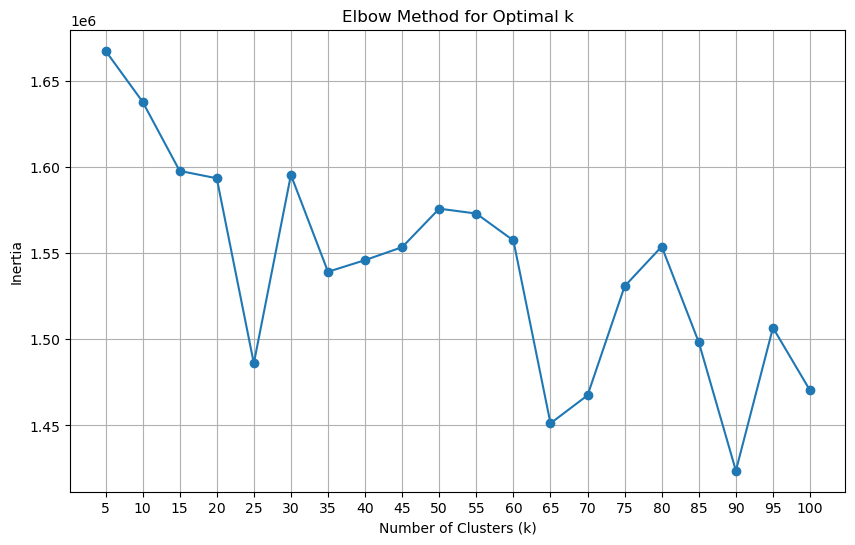

Excel reports with mapped application names generated successfully!


In [16]:
#Task--11

import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.cluster import MiniBatchKMeans
import xlsxwriter
import matplotlib.pyplot as plt

# Step 1: Load the LIBSVM file directly as a sparse matrix
def load_libsvm_file(file_path):
    """
    Loads the LibSVM file into a sparse matrix format
    """
    data, _ = load_svmlight_file(file_path)  # 'labels' are ignored for clustering
    return data

def plot_and_save_to_excel(kmeans, k, writer_top10, writer_all, mapping_df):
    """
    Generates and saves the cluster data, top-10 apps, and histograms to Excel
    """
    clusters = kmeans.labels_

    # DataFrame for storing User ID to Cluster mapping
    user_cluster_df = pd.DataFrame({
        'User ID Encoded': range(len(clusters)),
        'Cluster': clusters
    })

    # Reset index for mapping_df to allow access to both index and columns
    mapping_df_reset = mapping_df.reset_index()

    # Process for each cluster
    for cluster_num in range(k):
        # Filter data for each cluster
        cluster_data = user_app_matrix[user_cluster_df['Cluster'] == cluster_num]

        # Top 10 applications by frequency for each cluster
        top_app_counts = pd.Series(cluster_data.toarray().sum(axis=0)).nlargest(10)
        all_app_counts = pd.Series(cluster_data.toarray().sum(axis=0)).sort_values(ascending=False)

        # Map Application IDs to their names using mapping_df_reset
        top_apps_with_names = mapping_df_reset.loc[mapping_df_reset['ApplicationName_encoded'].isin(top_app_counts.index)].copy()
        top_apps_with_names['Frequency'] = top_app_counts.values
        top_apps_with_names['Cluster'] = cluster_num

        all_apps_with_names = mapping_df_reset.loc[mapping_df_reset['ApplicationName_encoded'].isin(all_app_counts.index)].copy()
        all_apps_with_names['Frequency'] = all_app_counts.values
        all_apps_with_names['Cluster'] = cluster_num

        # Creating Excel entries for top 10 apps
        top_apps_with_names.to_excel(writer_top10, sheet_name=f'K={k}', startrow=cluster_num * 15, index=False)

        # Adding a histogram for the top 10 applications in each cluster
        chart_top = writer_top10.book.add_chart({'type': 'column'})
        chart_top.add_series({
            'categories': [f'K={k}', cluster_num * 15 + 1, 1, cluster_num * 15 + 10, 1],  # Adjusted for top 10
            'values': [f'K={k}', cluster_num * 15 + 1, 2, cluster_num * 15 + 10, 2],  # Adjusted for top 10
            'name': f'Cluster {cluster_num + 1} - Top 10 Apps'
        })
        writer_top10.sheets[f'K={k}'].insert_chart(f'G{cluster_num * 15 + 1}', chart_top)

        # Creating Excel entries for all applications
        all_apps_with_names.to_excel(writer_all, sheet_name=f'K={k}', startrow=cluster_num * 15, index=False)

        # Adding a histogram for all applications in each cluster
        chart_all = writer_all.book.add_chart({'type': 'column'})
        chart_all.add_series({
            'categories': [f'K={k}', cluster_num * 15 + 1, 1, cluster_num * 15 + len(all_app_counts), 1],
            'values': [f'K={k}', cluster_num * 15 + 1, 2, cluster_num * 15 + len(all_app_counts), 2],
            'name': f'Cluster {cluster_num + 1} - All Apps'
        })
        writer_all.sheets[f'K={k}'].insert_chart(f'G{cluster_num * 15 + 1}', chart_all)

# Step 3: Elbow Method for Optimal k by plotting inertia (sum of sq dist)
def plot_elbow_method(k_values, inertia_values):
    """
    Plots the Elbow Method to find the optimal number of clusters (k)
    """
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia_values, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.xticks(k_values)
    plt.savefig('elbow_method_plot.png')
    plt.show()

# Main clustering loop
if __name__ == "__main__":
    # Step 4: Load the LIBSVM file
    user_app_matrix = load_libsvm_file('Username_application_libsvm_format_filled.txt')

    # Step 5: Load the mapping file to map Application IDs to Names
    mapping_file = 'cleaned_encoded_decoded_col.csv'
    mapping_df = pd.read_csv(mapping_file)
    mapping_df = mapping_df[['ApplicationName_encoded', 'ApplicationName']].drop_duplicates().set_index('ApplicationName_encoded')

    # Step 6: Initialize variables for the clustering process
    k_values = range(5, 101, 5)  # K = 5, 10, 15, ..., 100
    inertia_values = []  # List to store inertia values

    # Step 7: Use XlsxWriter to create separate Excel files for top 10 and all applications
    with pd.ExcelWriter('clustering_report_top10_apps_mapped.xlsx', engine='xlsxwriter') as writer_top10, \
         pd.ExcelWriter('clustering_report_all_apps_mapped.xlsx', engine='xlsxwriter') as writer_all:
        for k in k_values:
            print(f'Running clustering for K = {k}...')

            # Apply MiniBatchKMeans clustering
            kmeans = MiniBatchKMeans(n_clusters=k, random_state=0, n_init=10, batch_size=100)
            kmeans.fit(user_app_matrix)  # Fit the model on the sparse matrix

            # Append the inertia (distortion) value for this k
            inertia_values.append(kmeans.inertia_)

            # Add sheets for each K
            writer_top10.book.add_worksheet(f'K={k}')
            writer_all.book.add_worksheet(f'K={k}')

            # Plot and save the results to the Excel files for top 10 and all applications
            plot_and_save_to_excel(kmeans, k, writer_top10, writer_all, mapping_df)

    # Step 8: Plot the elbow method graph
    plot_elbow_method(k_values, inertia_values)
    print("Excel reports with mapped application names generated successfully!")

                      ApplicationName  ApplicationName_encoded  \
0  microsoft sql server native client                     1416   
1  microsoft sql server native client                     1416   
2  microsoft sql server native client                     1416   
3  microsoft sql server native client                     1416   
4  microsoft sql server native client                     1416   

  Clean User Name  Clean User Name_encoded Clean PC Name  \
0       USR071303                    18127      PC075575   
1       USR044665                     1362      PC056563   
2       USR093451                    28438      PC090335   
3       USR059830                    10750      PC127891   
4       USR072726                    19069      PC056957   

   Clean PC Name_encoded   SBU  SBU_encoded   SBG  SBG_encoded  \
0                  27652   CSM           21  AERO            0   
1                  20656   AIS            5   ESS            3   
2                  33056   AIS            5 

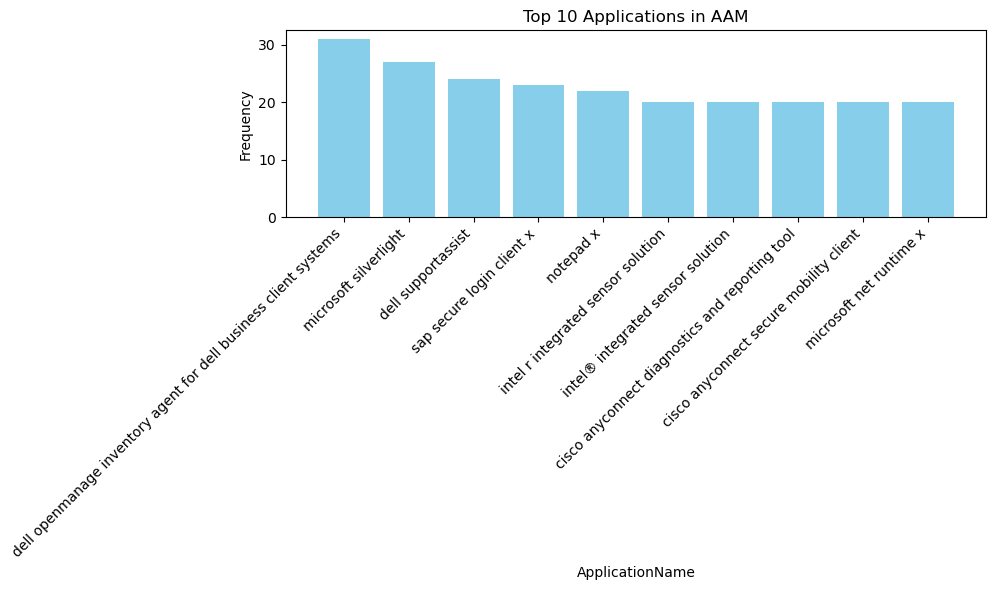

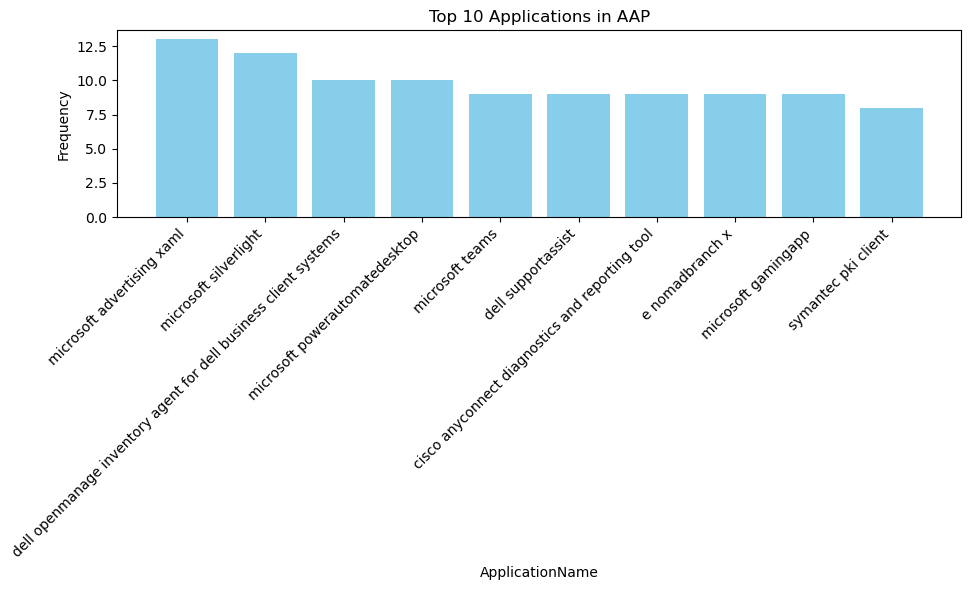

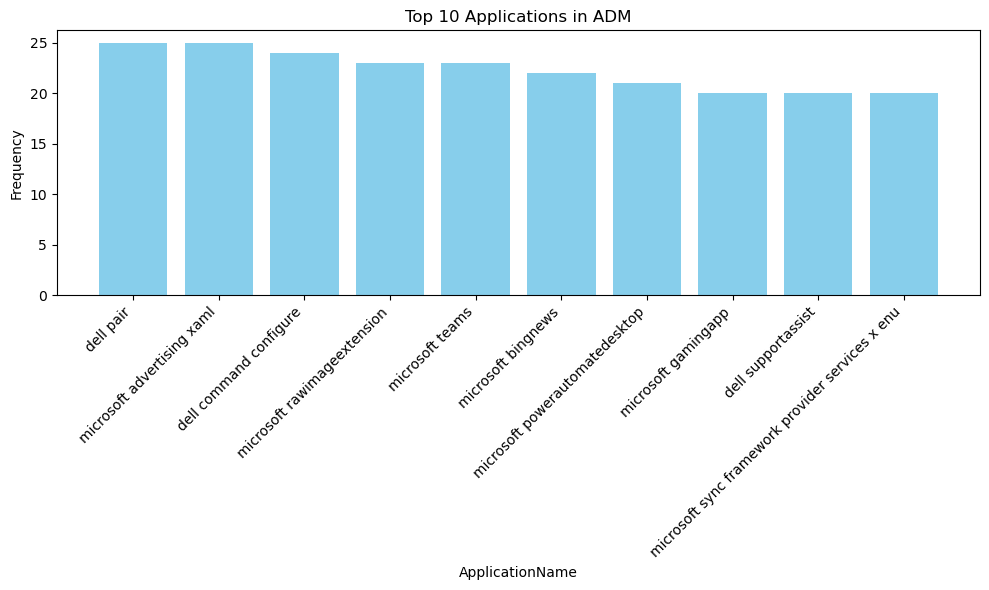

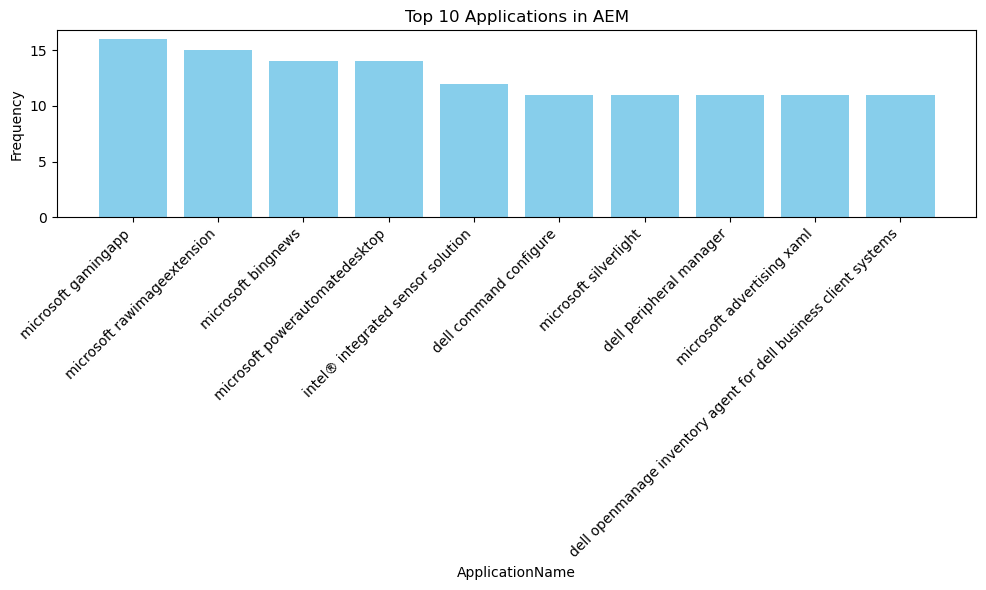

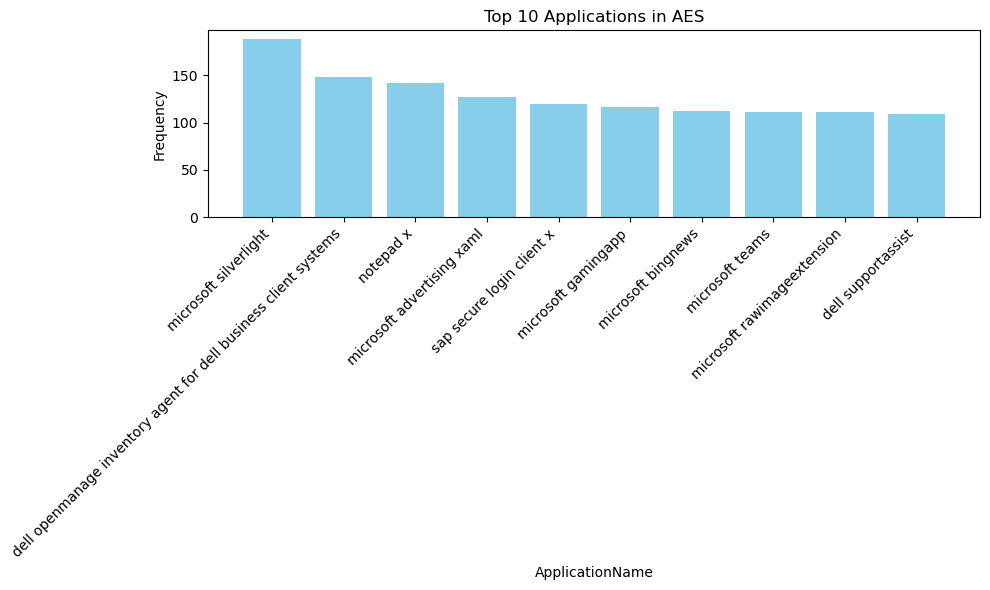

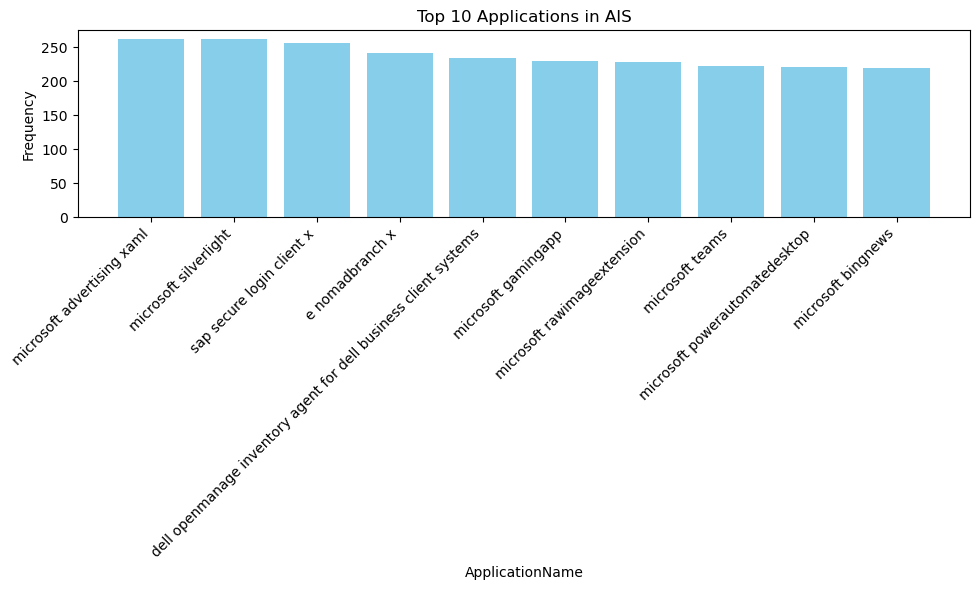

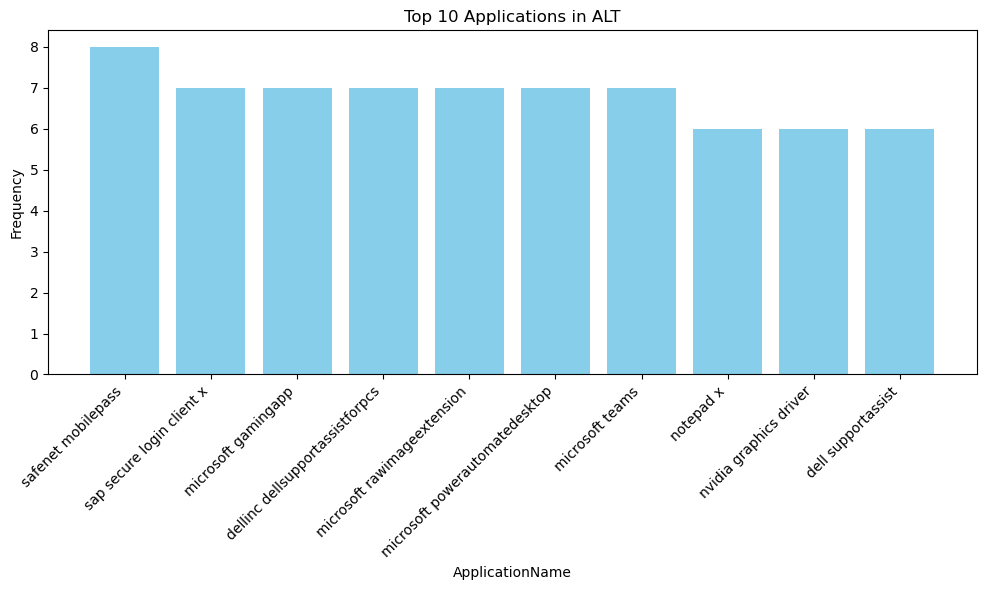

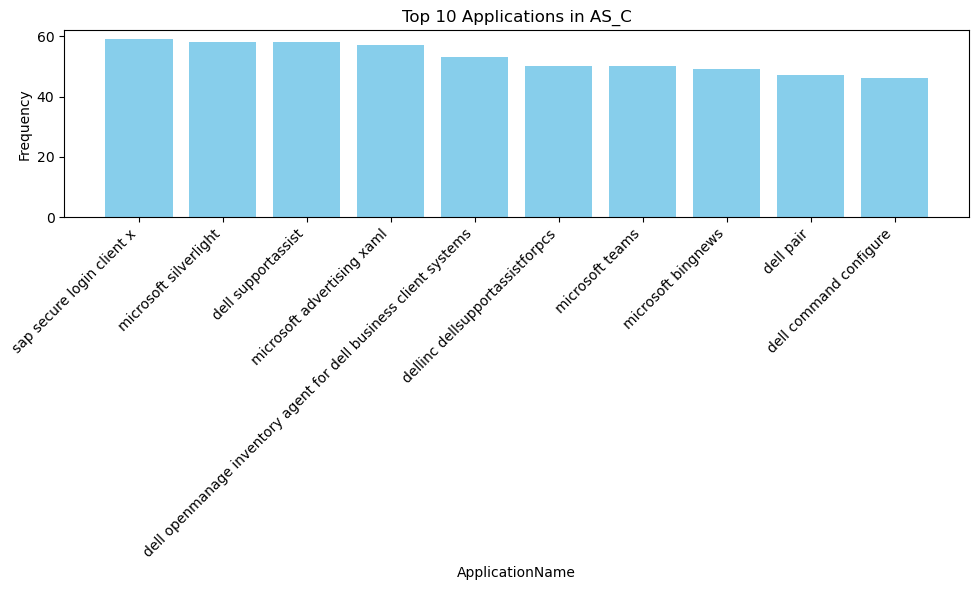

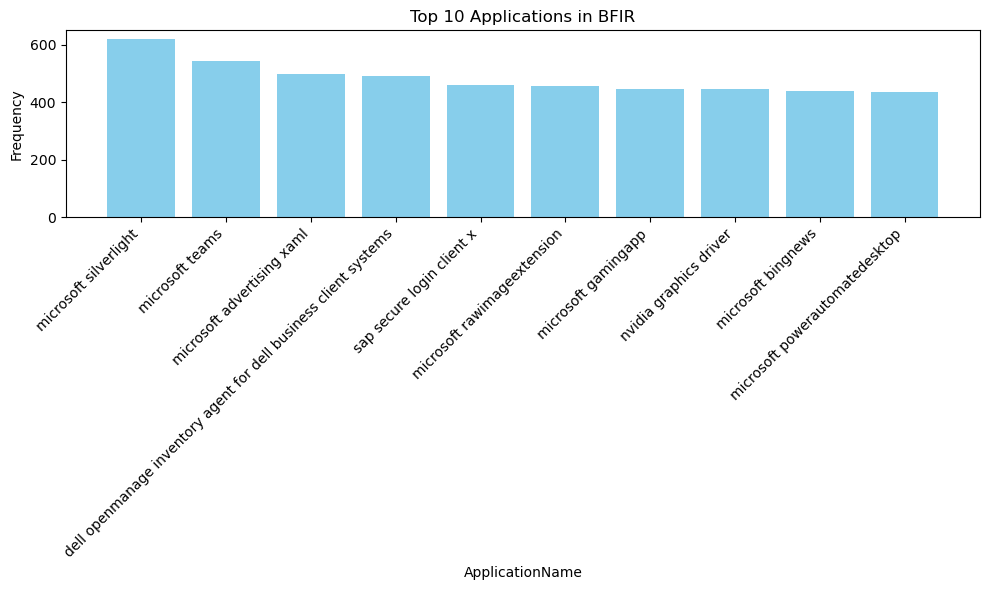

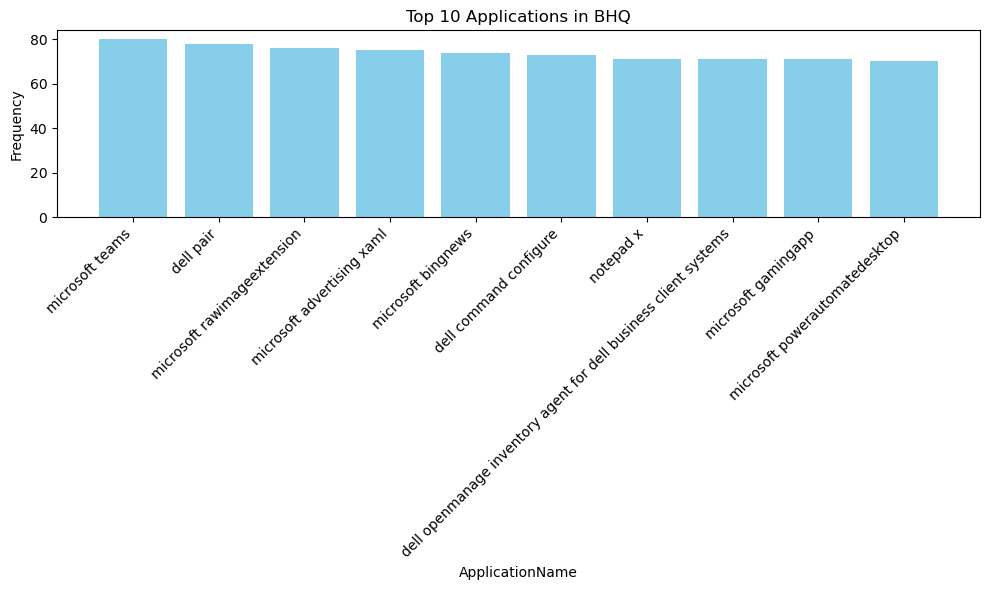

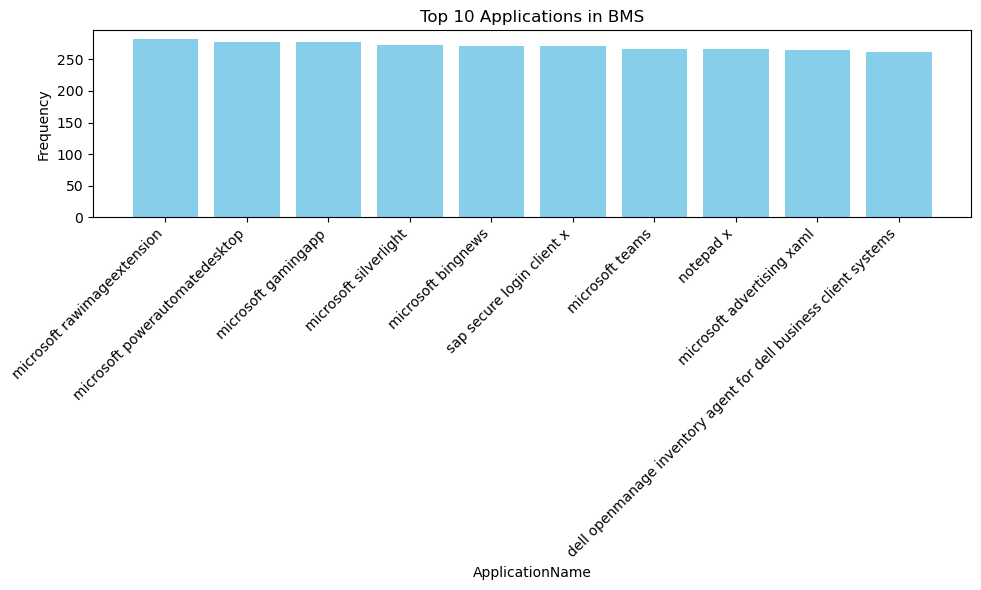

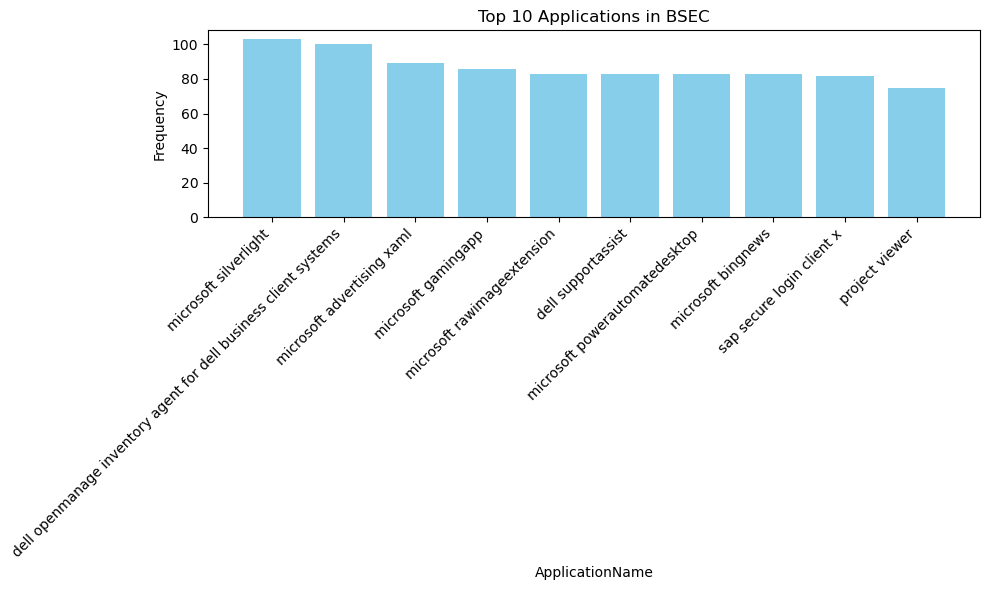

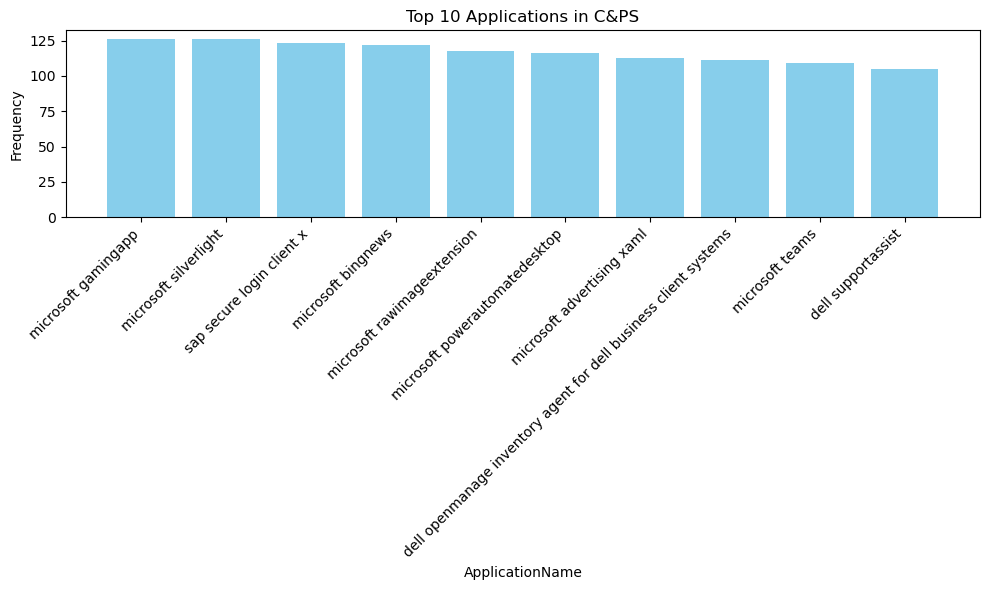

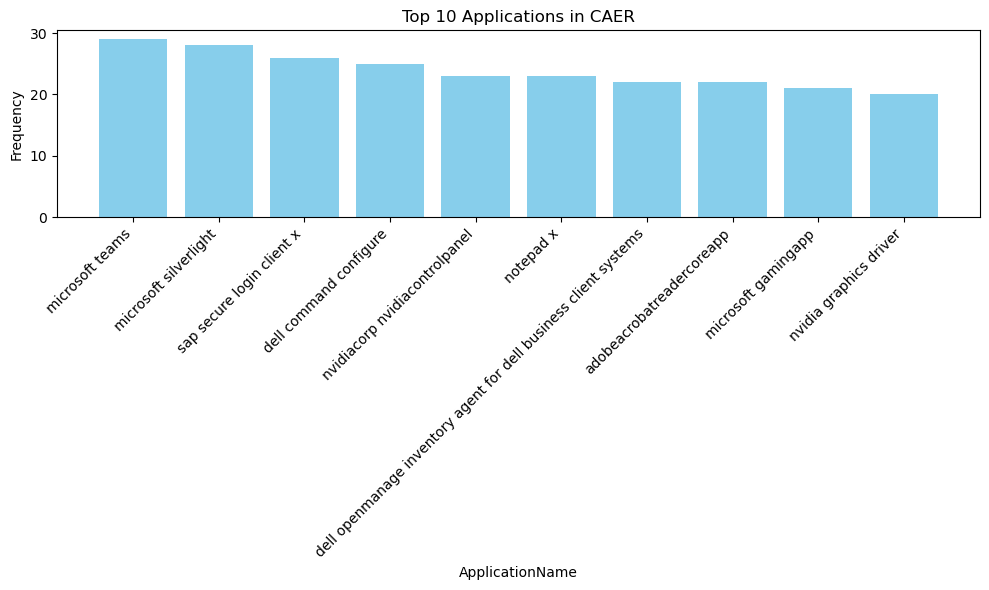

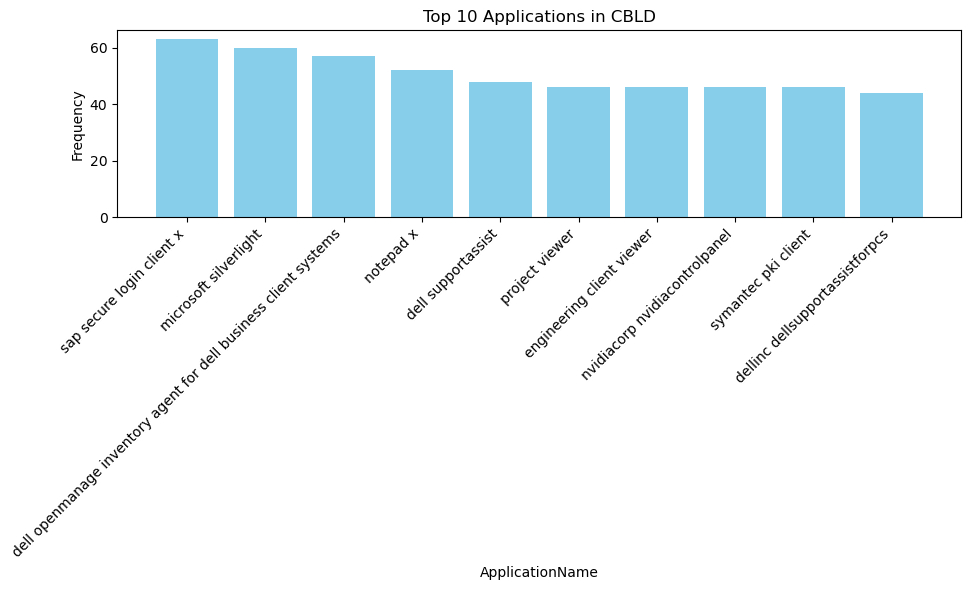

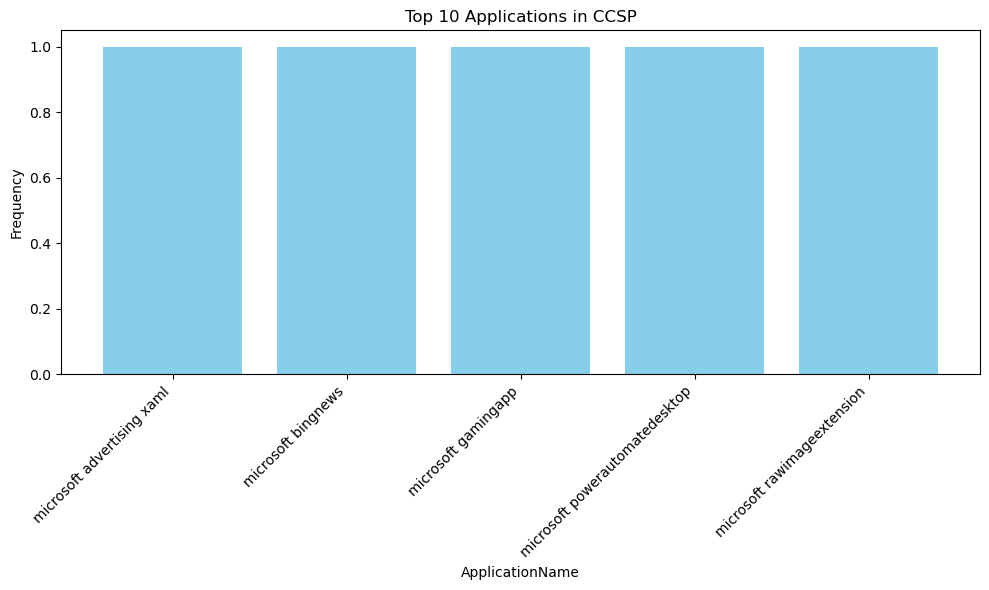

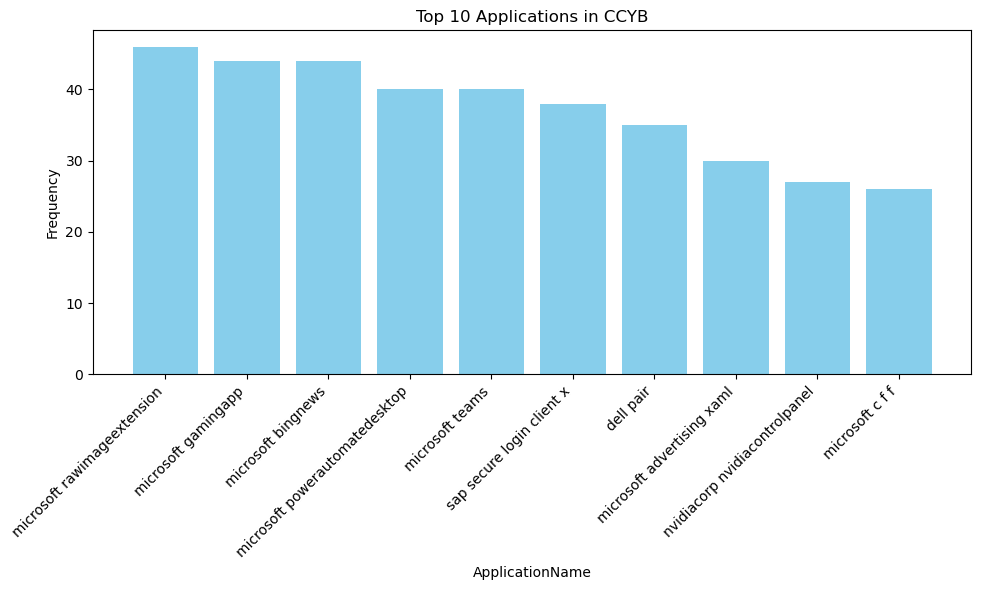

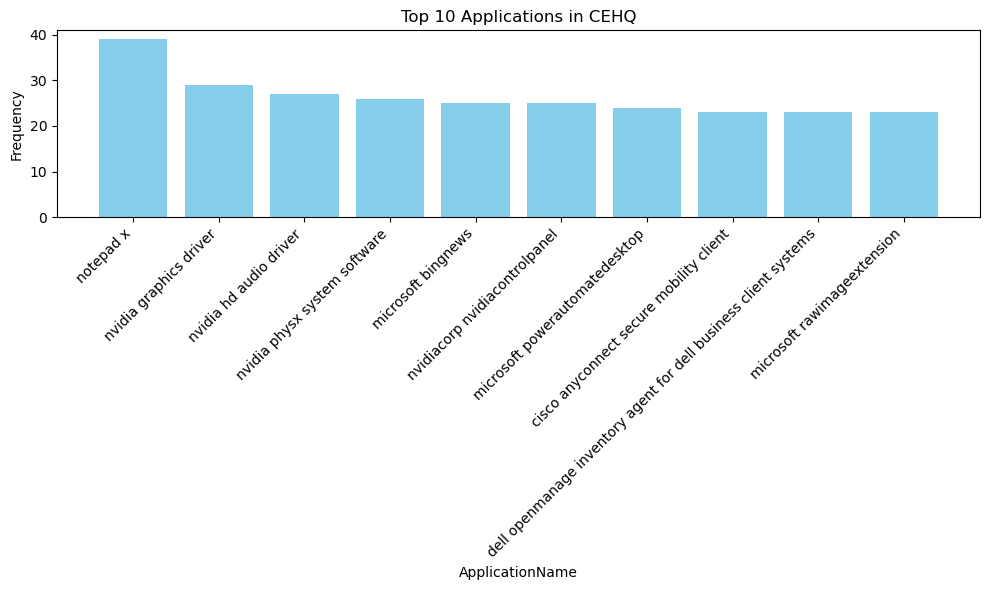

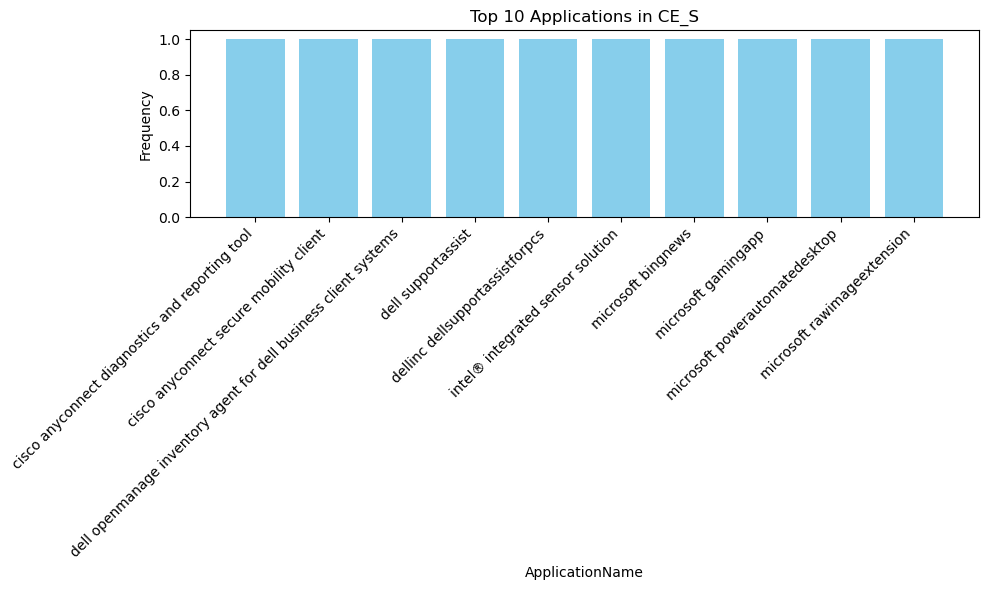

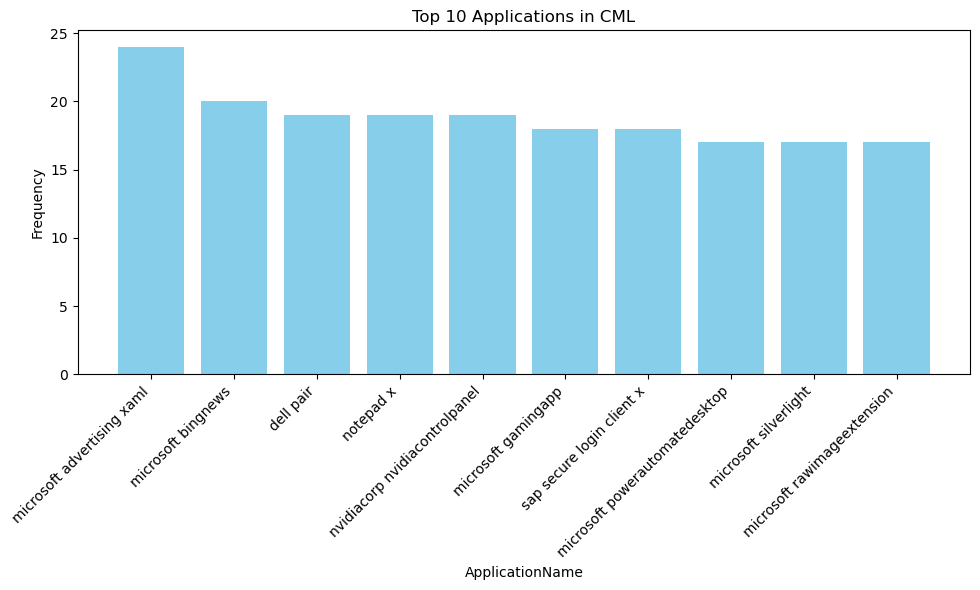

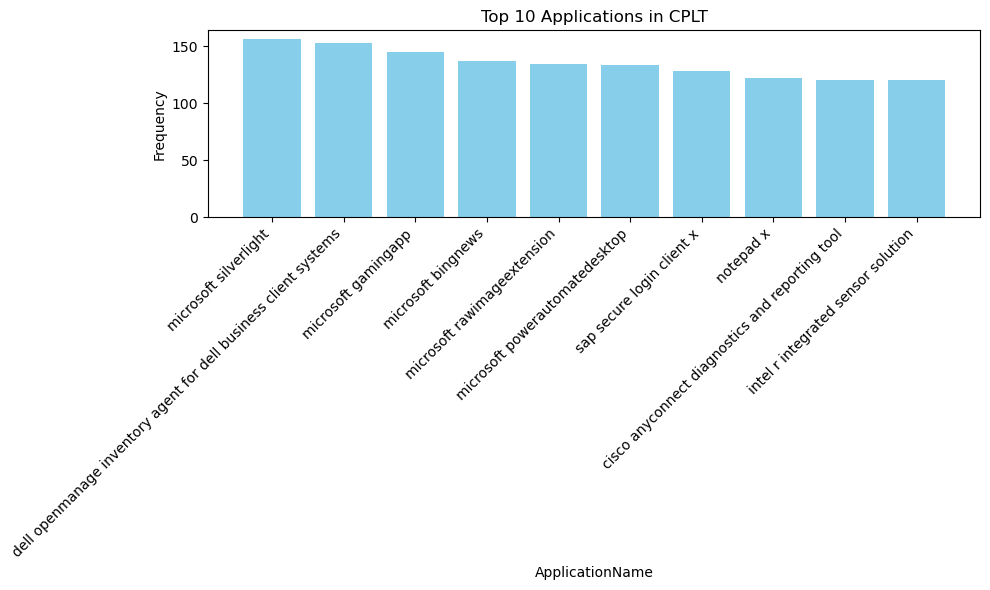

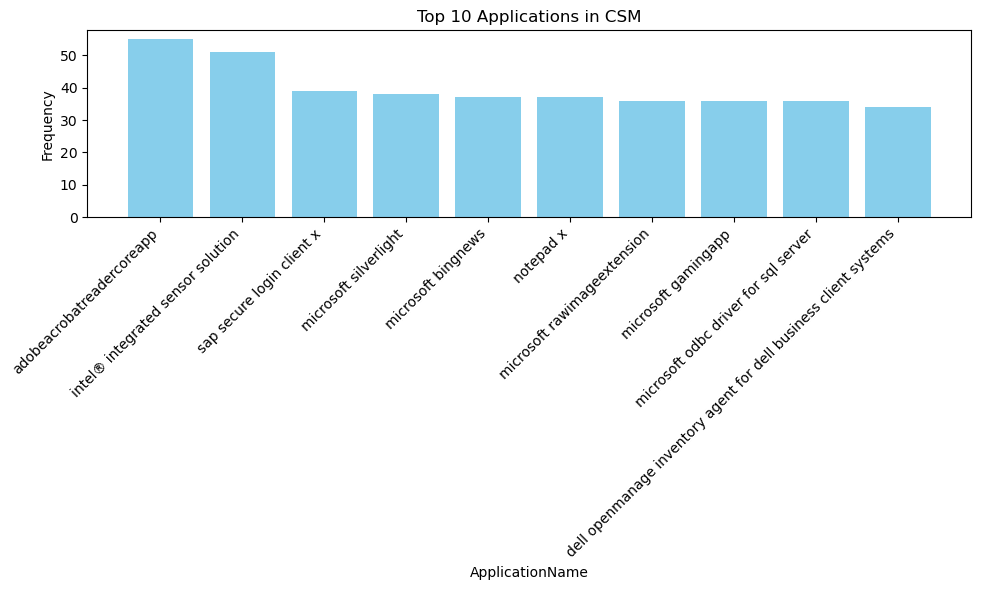

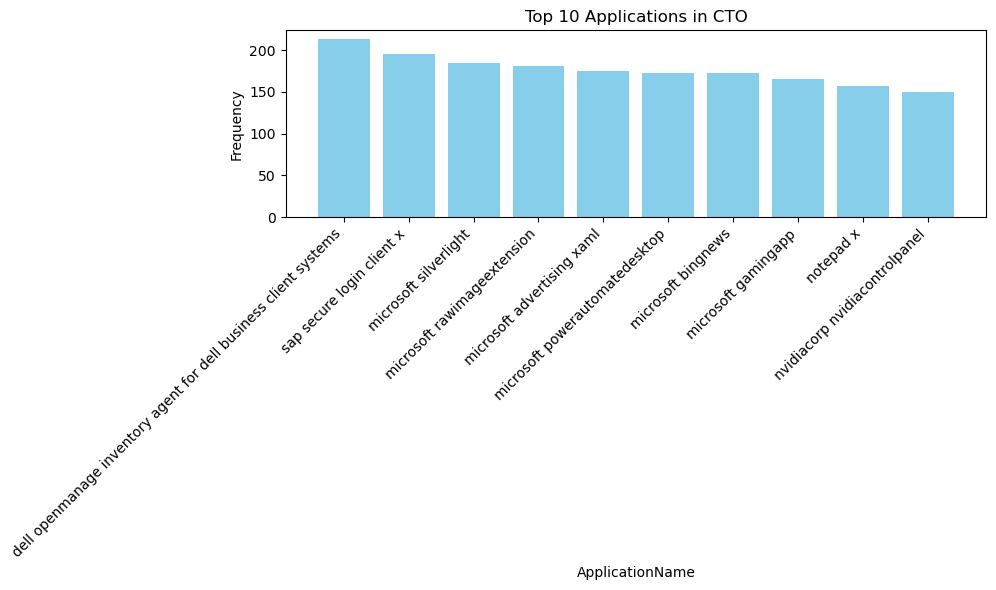

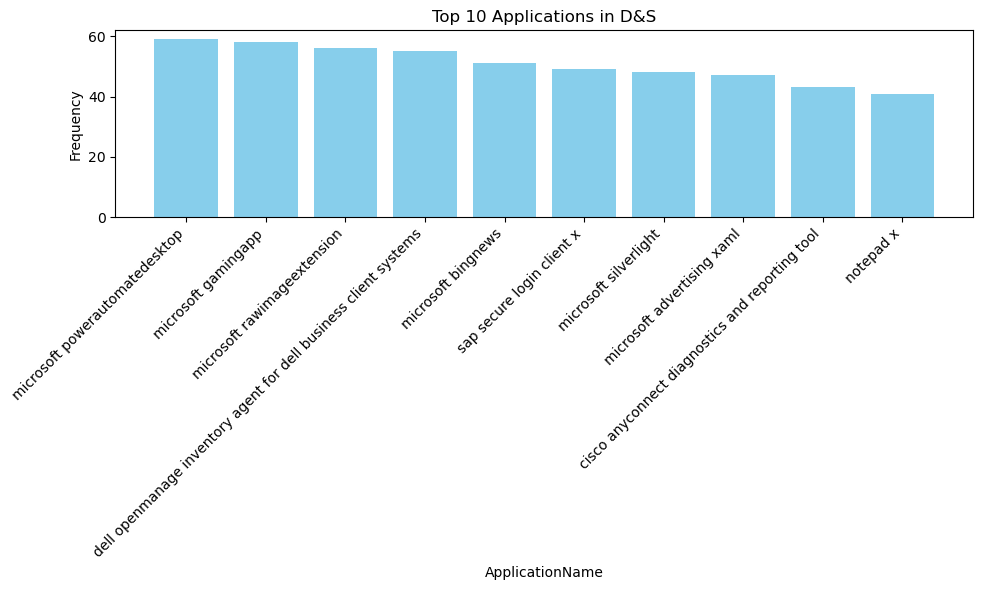

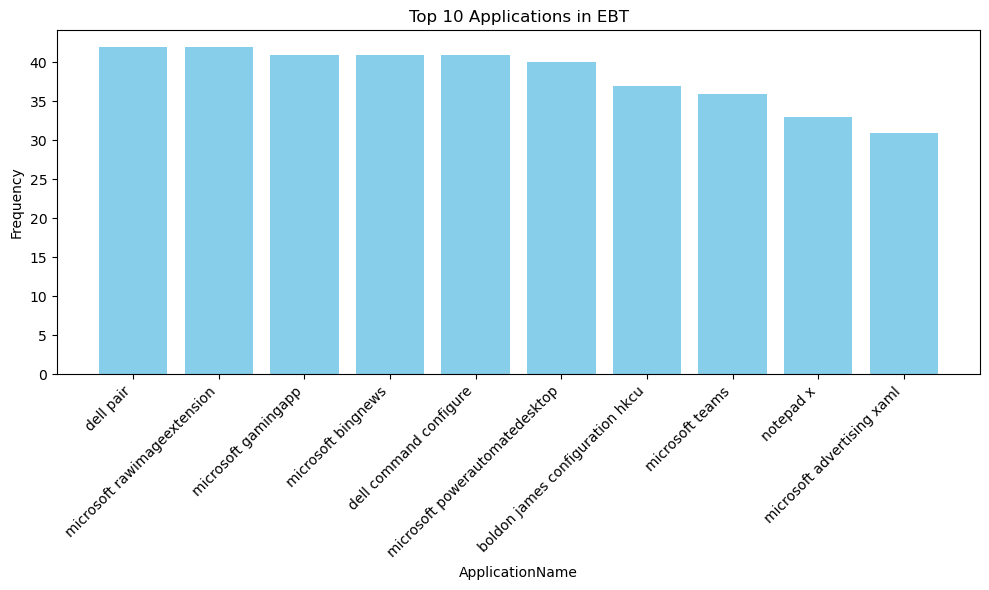

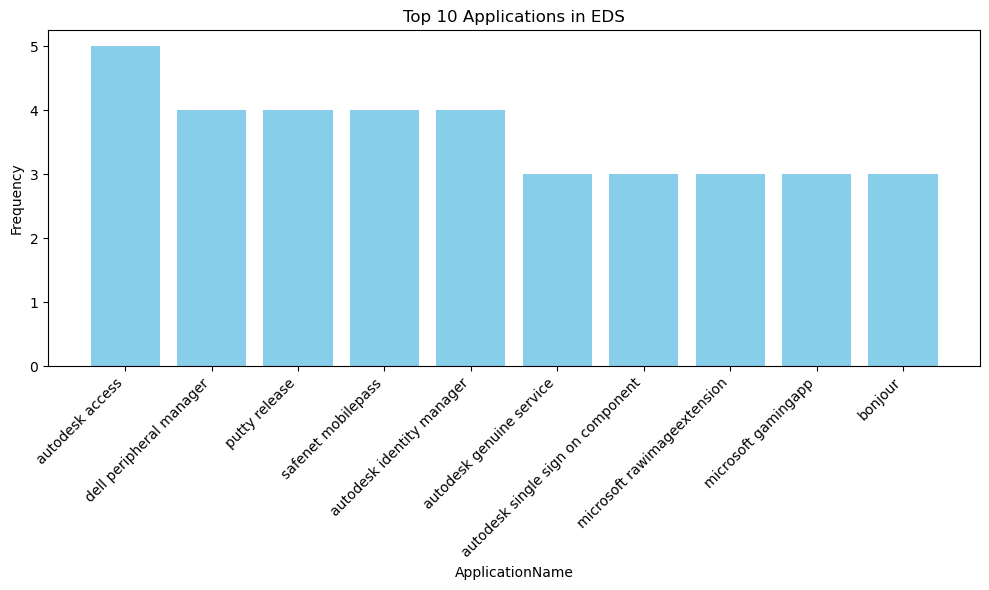

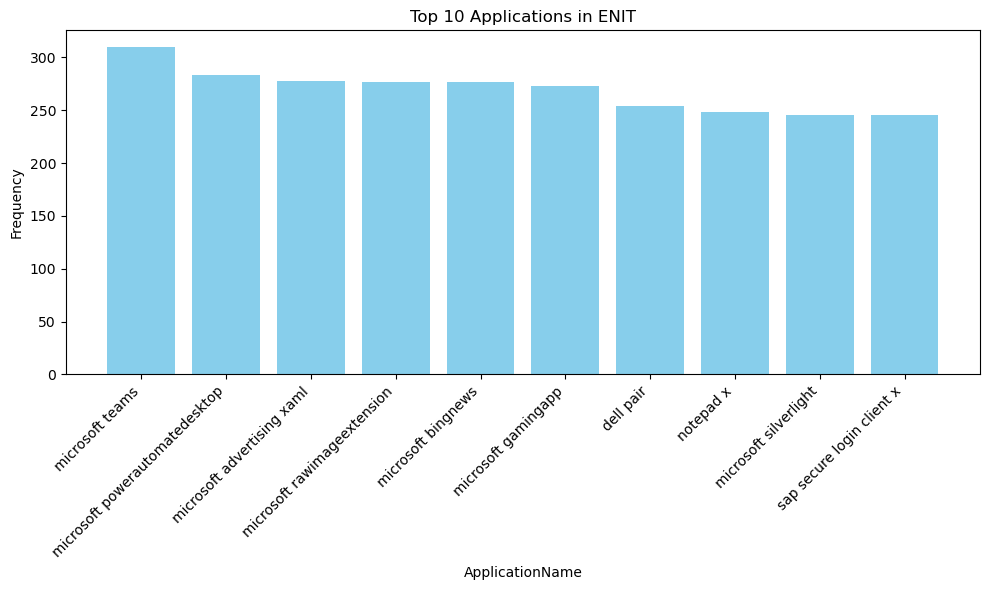

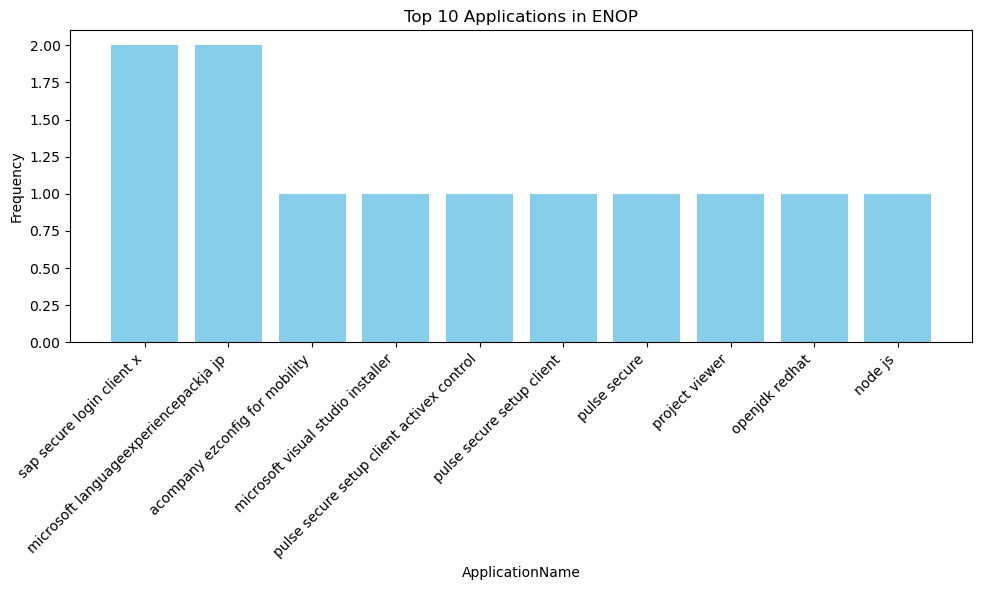

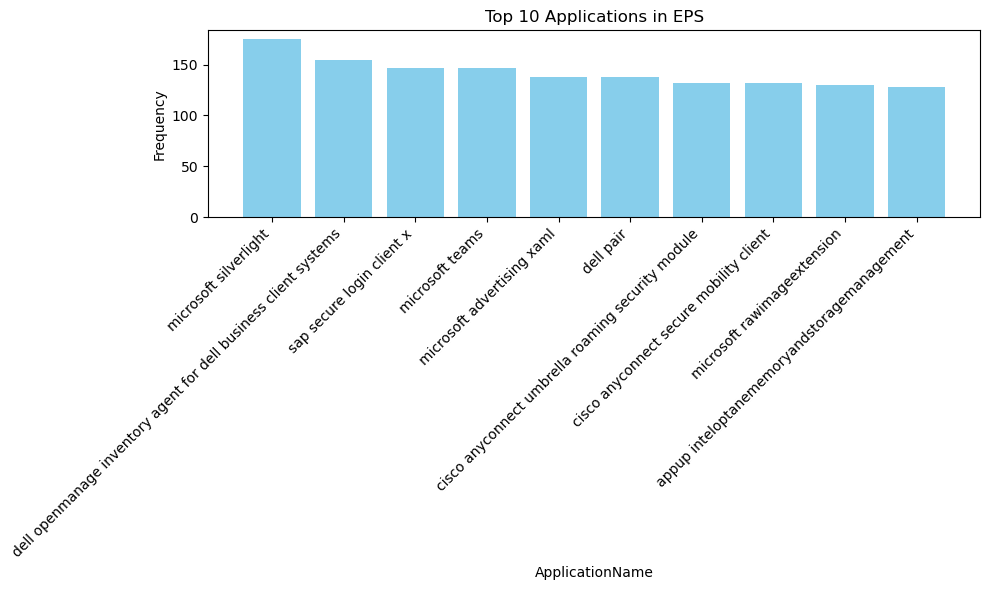

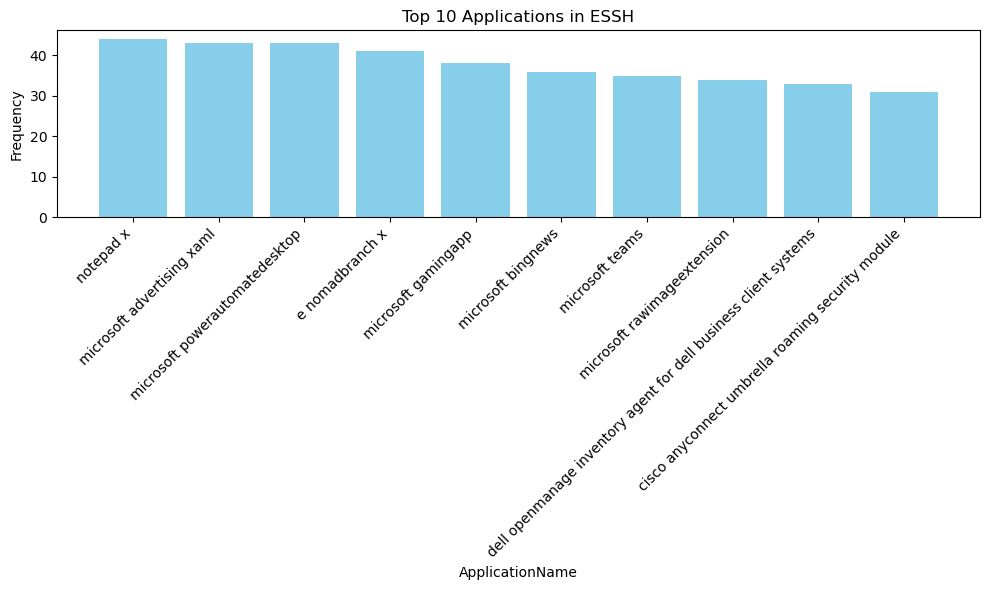

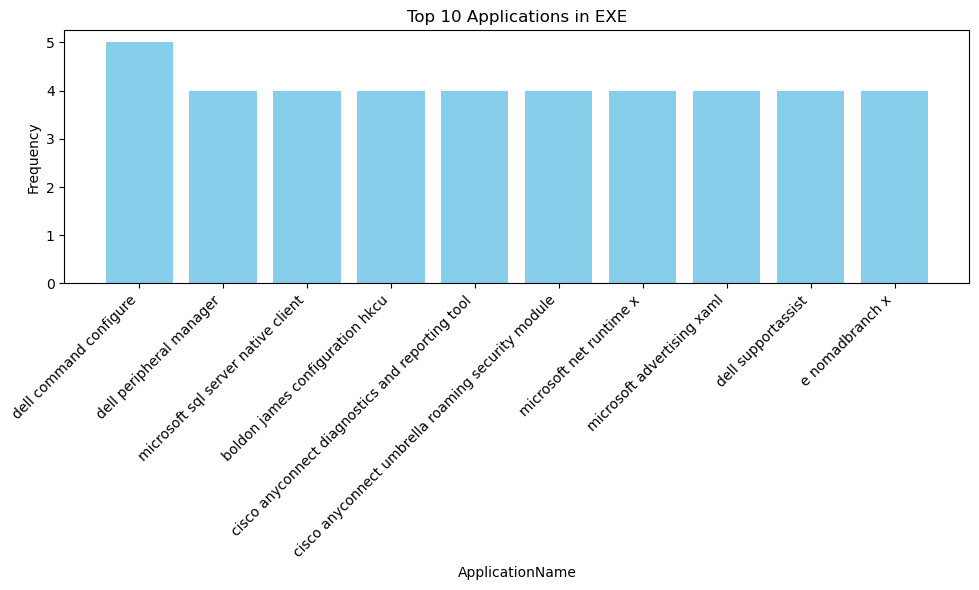

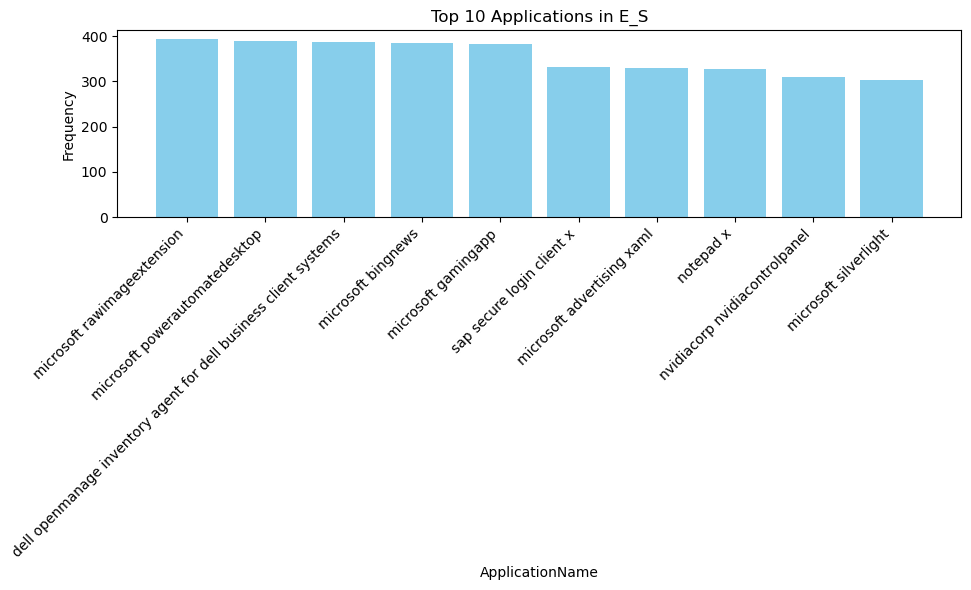

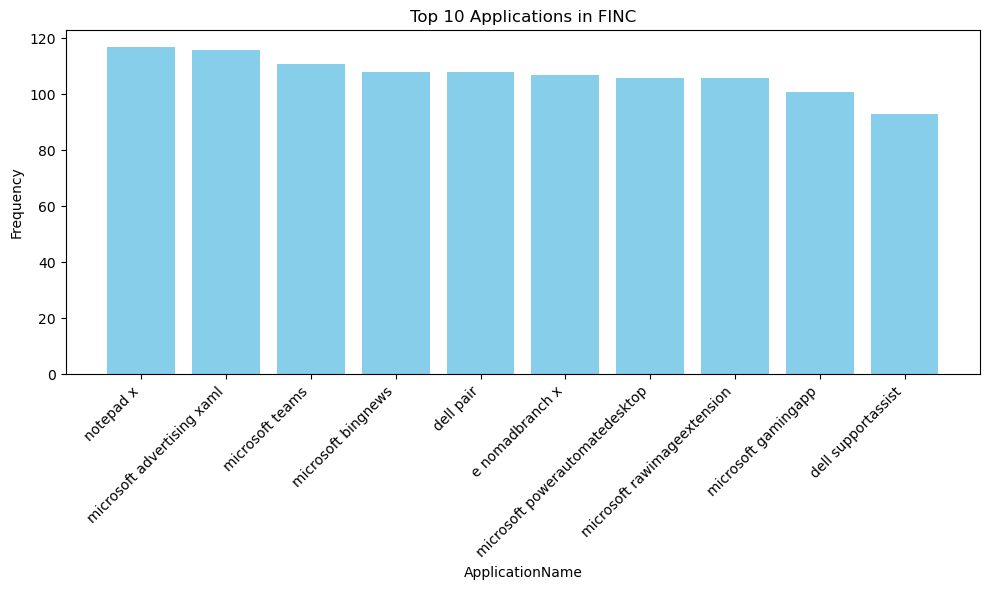

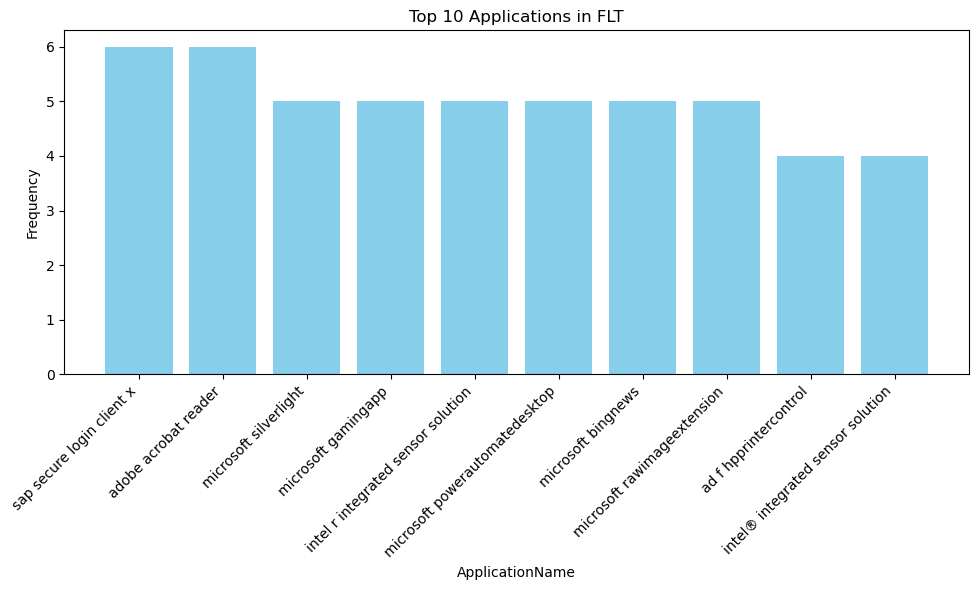

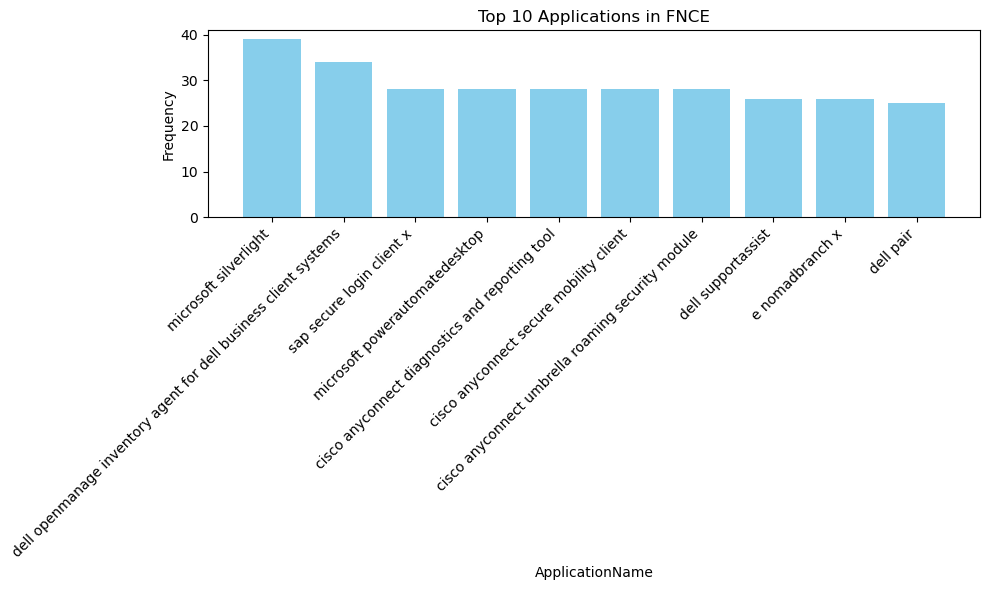

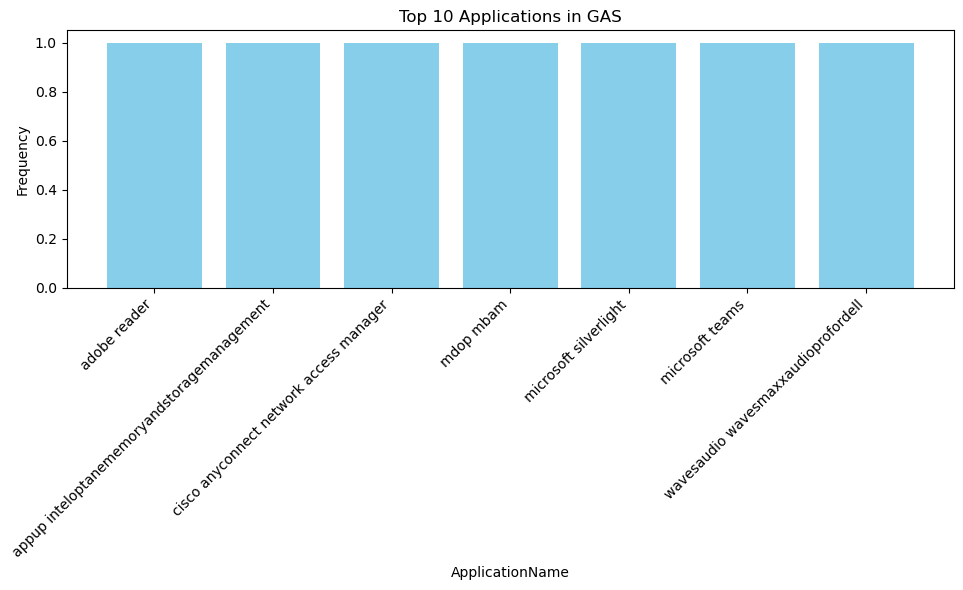

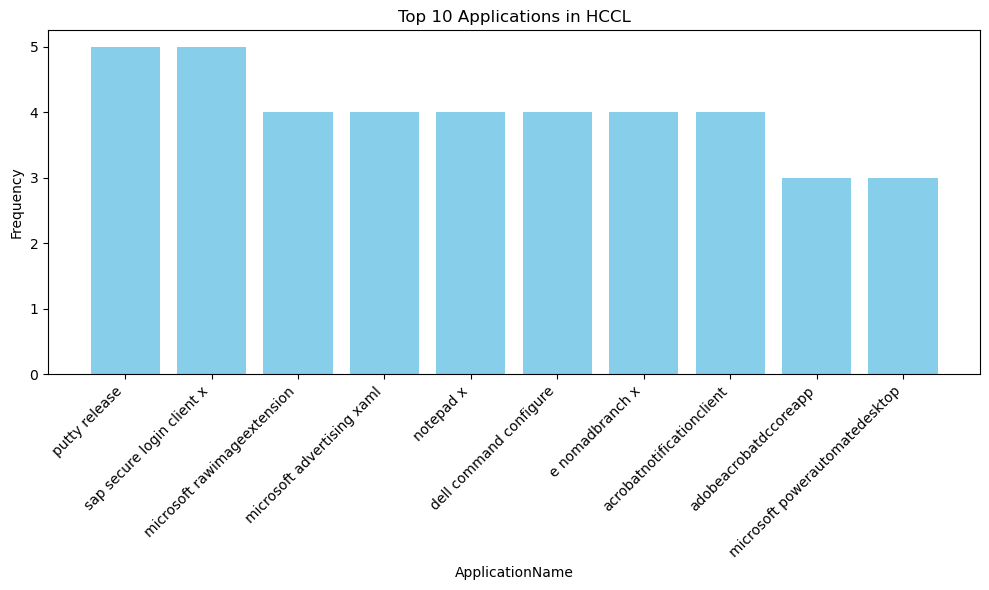

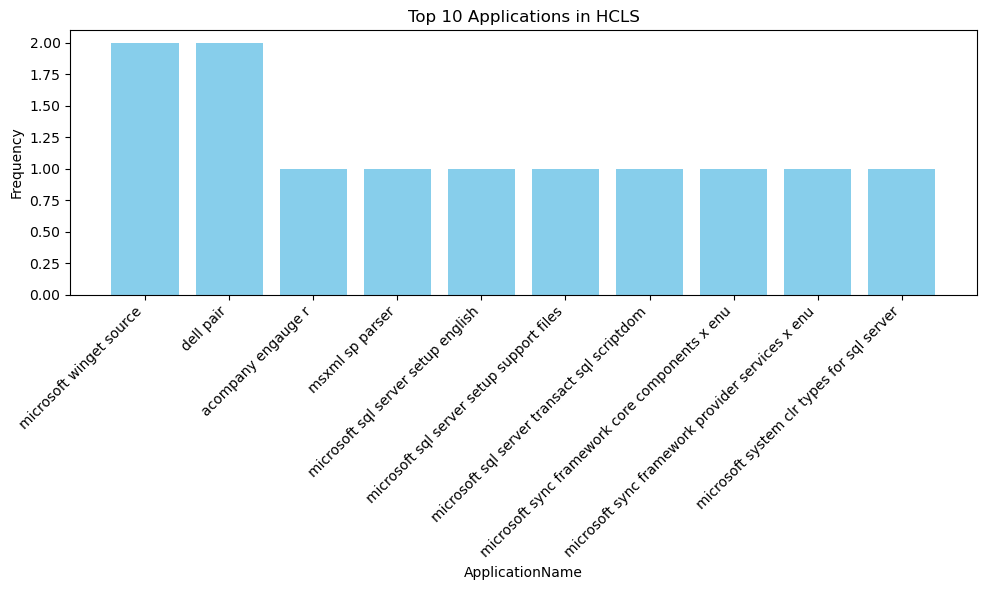

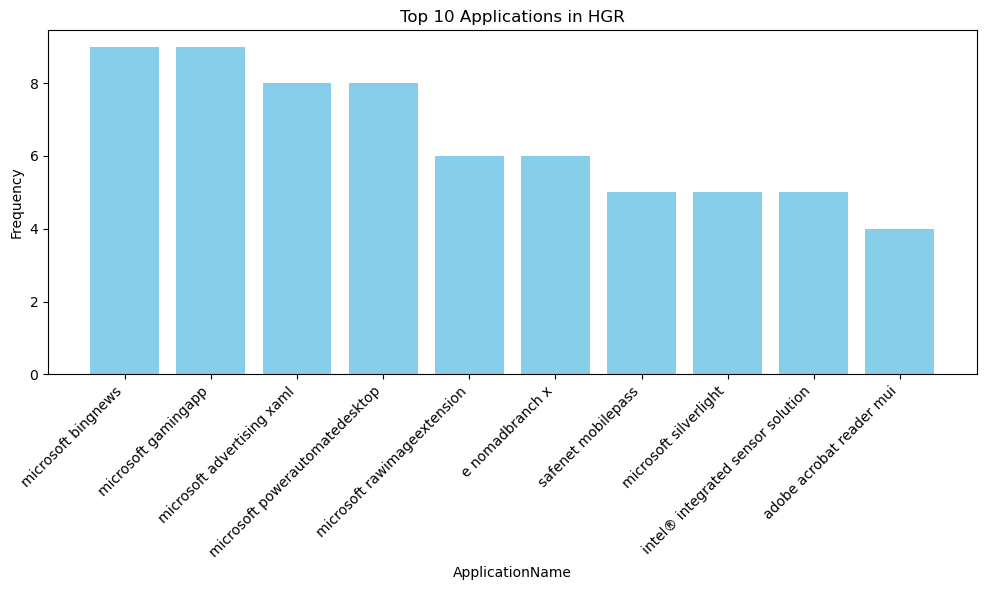

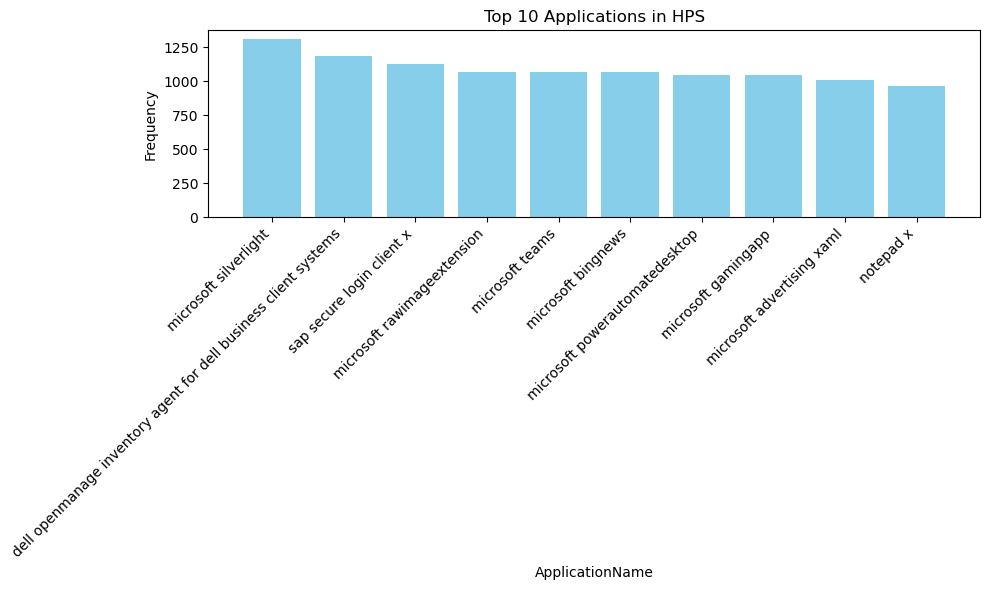

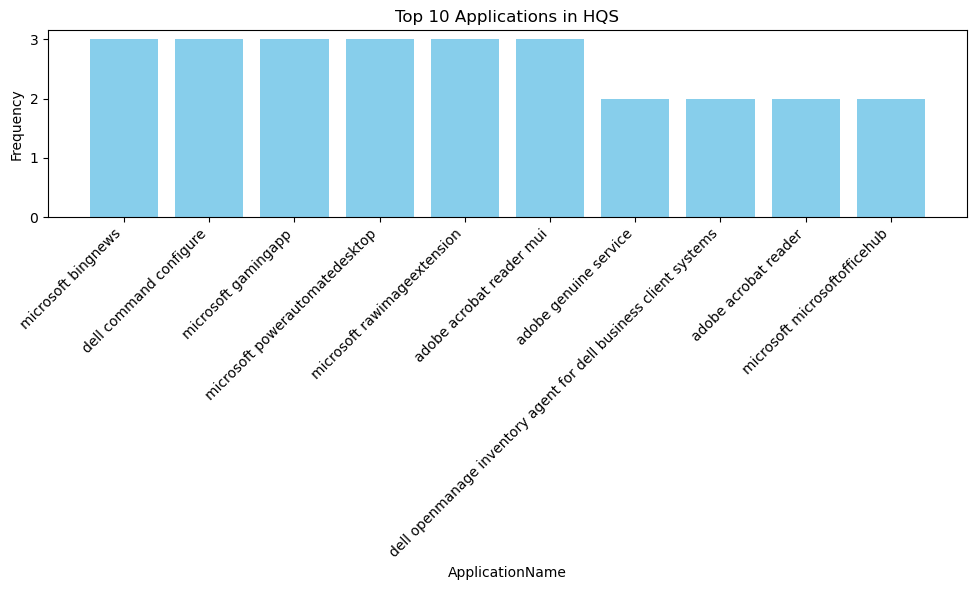

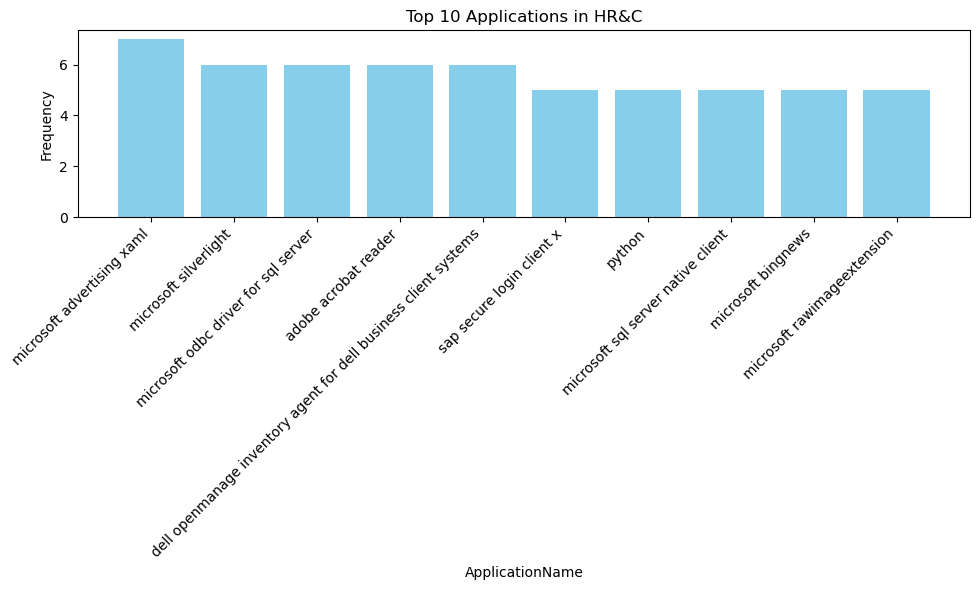

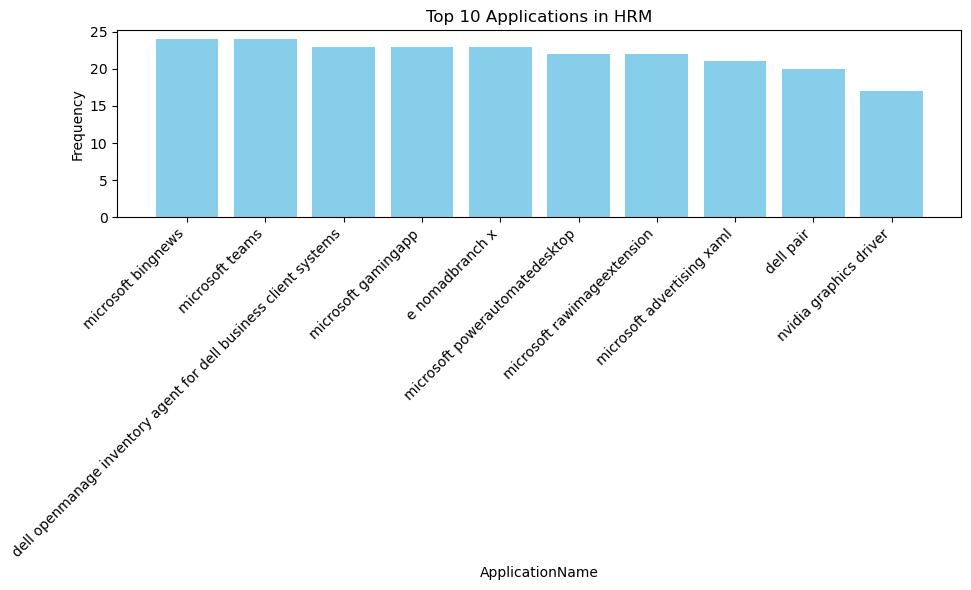

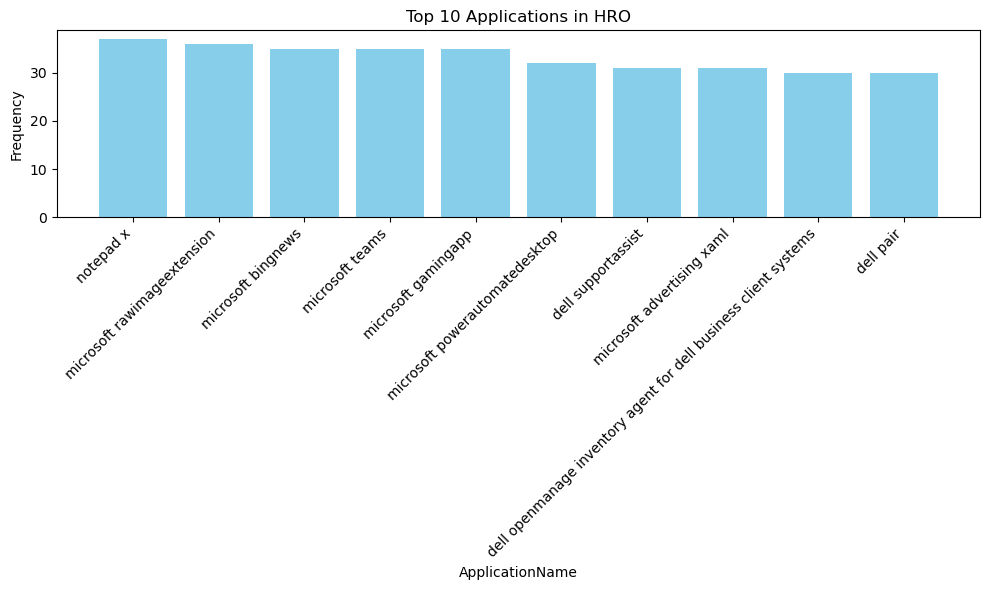

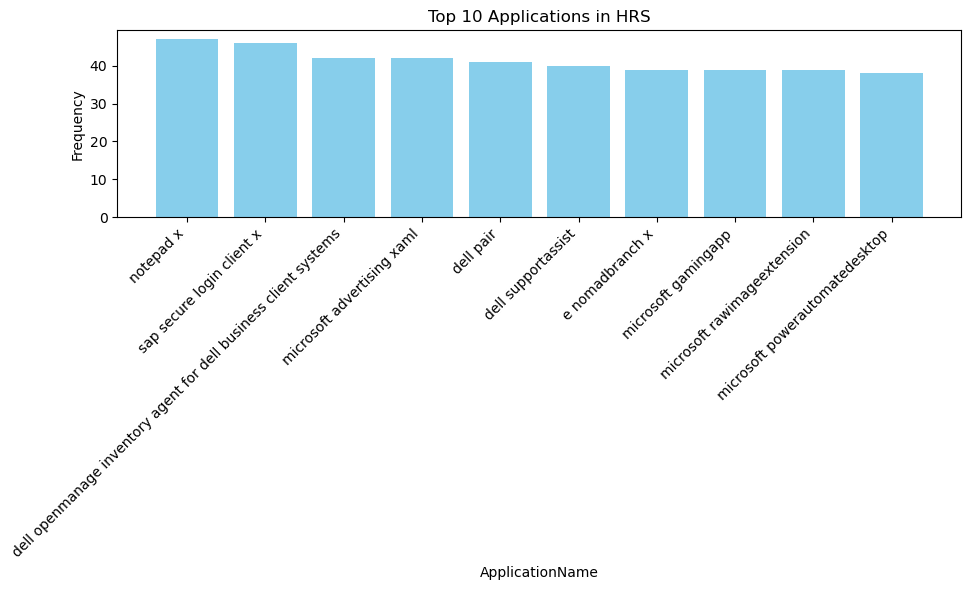

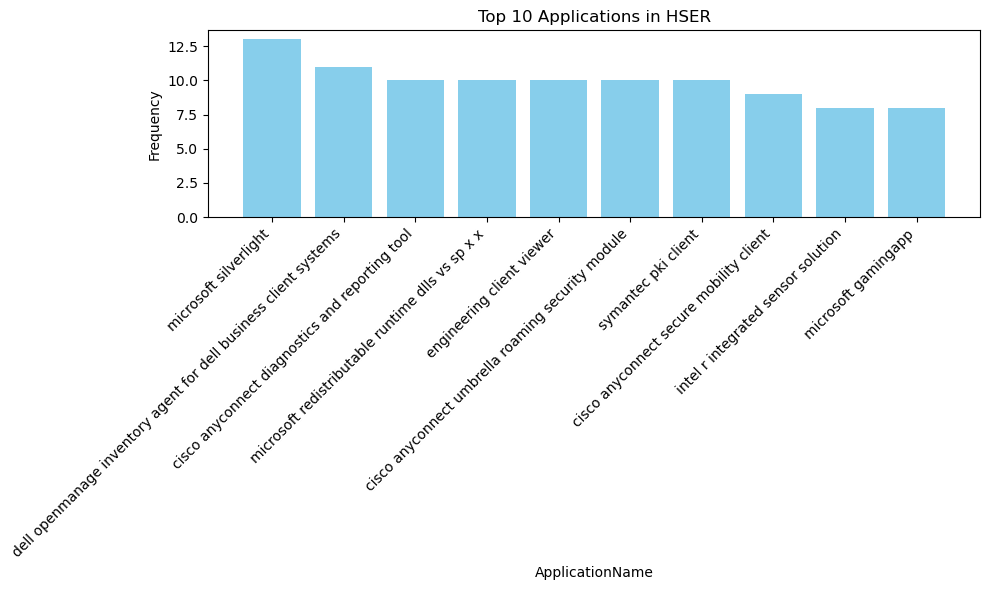

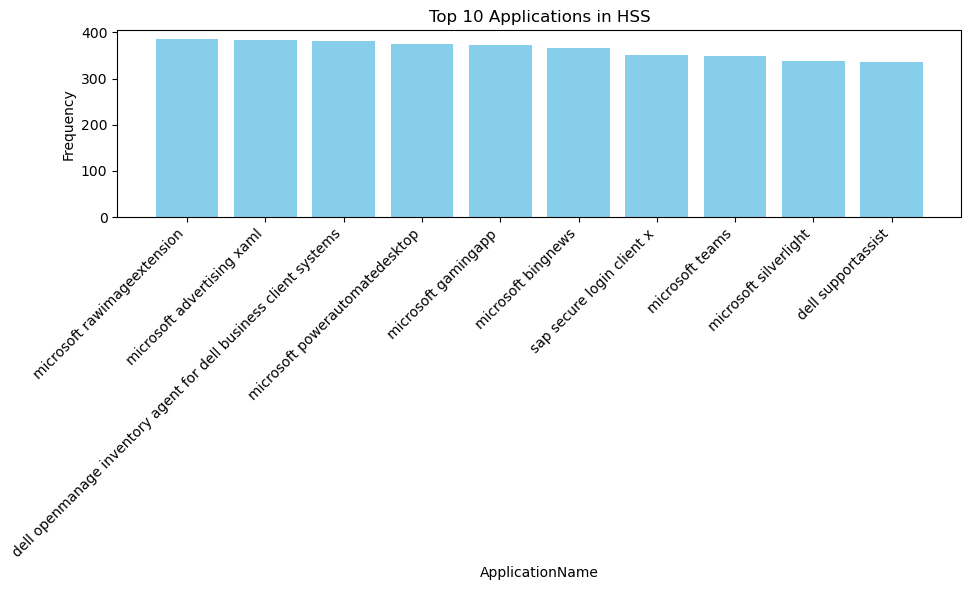

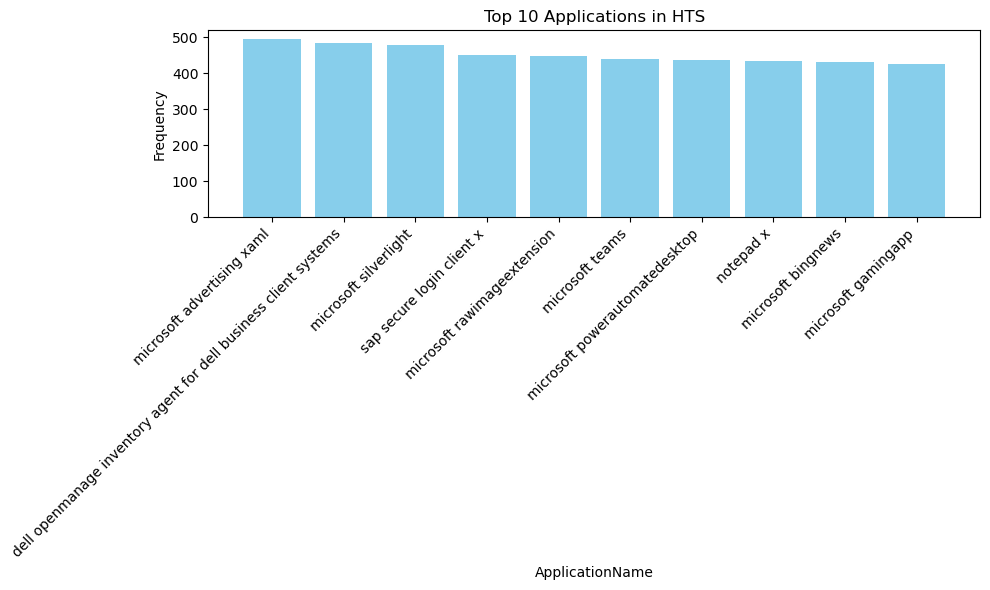

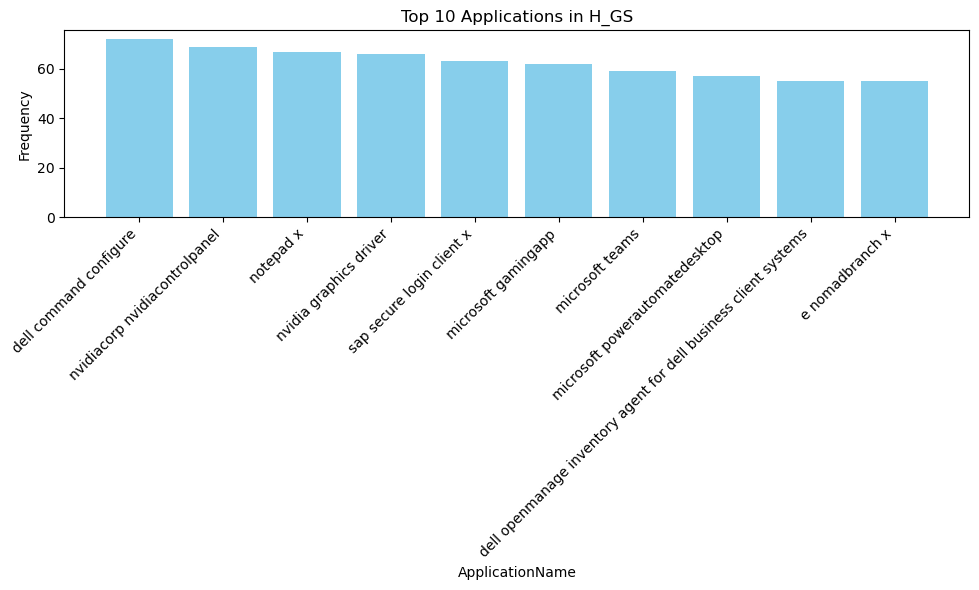

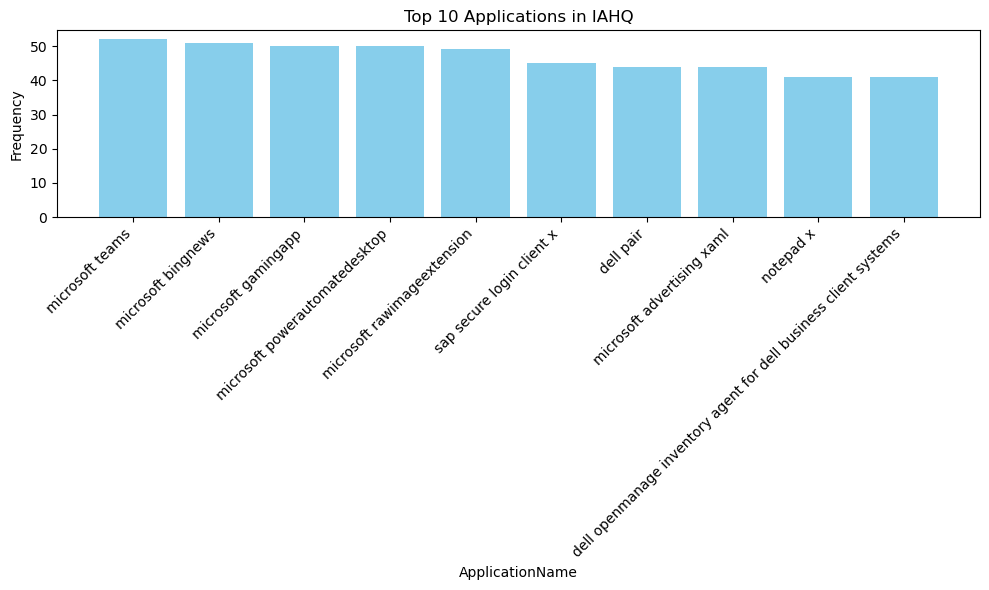

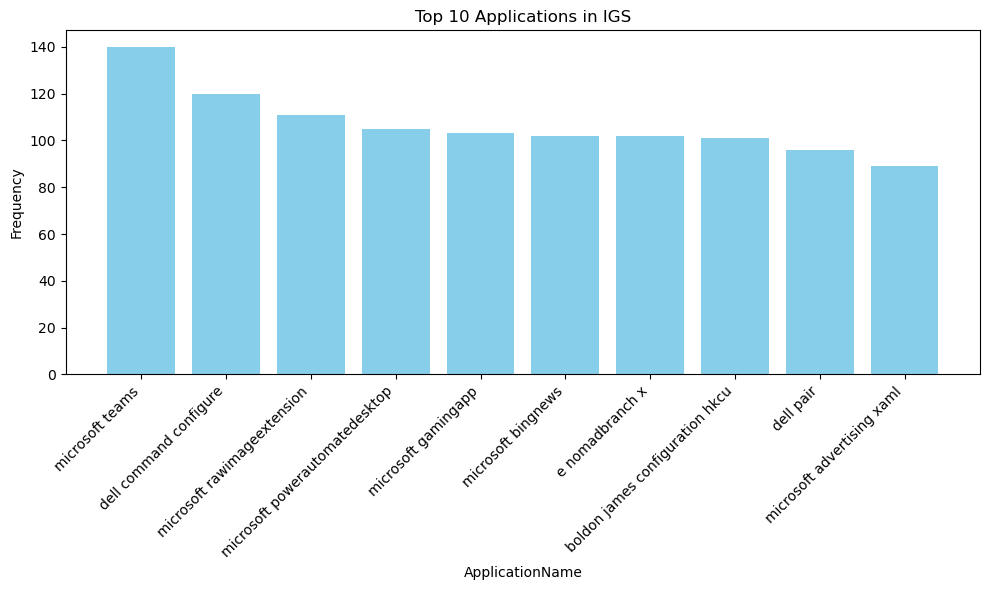

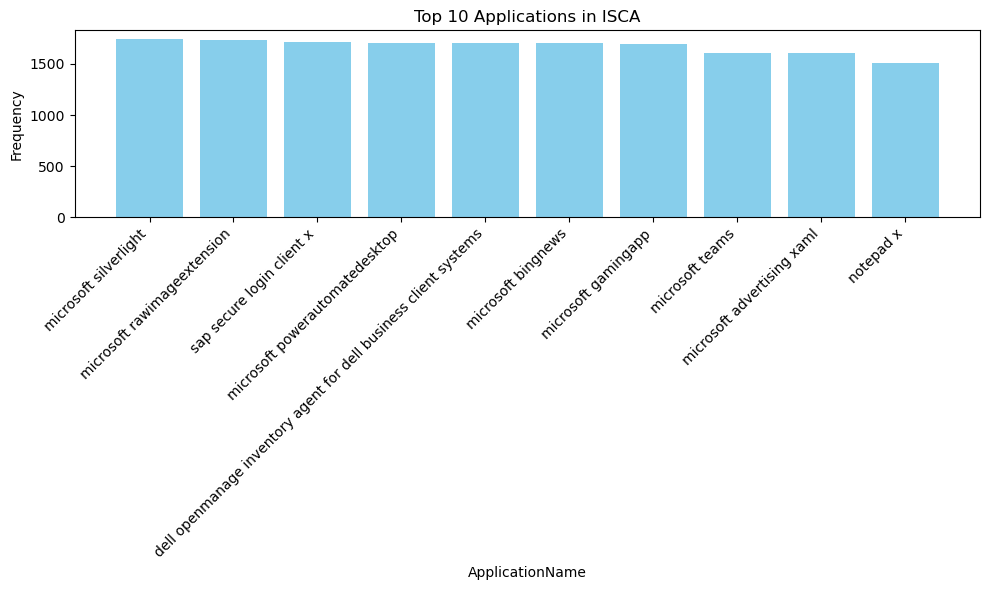

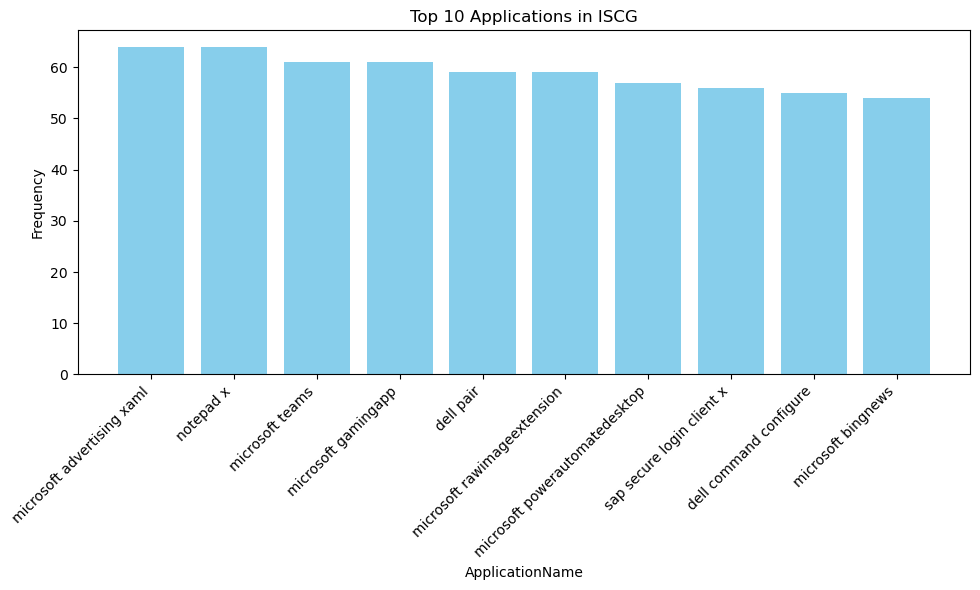

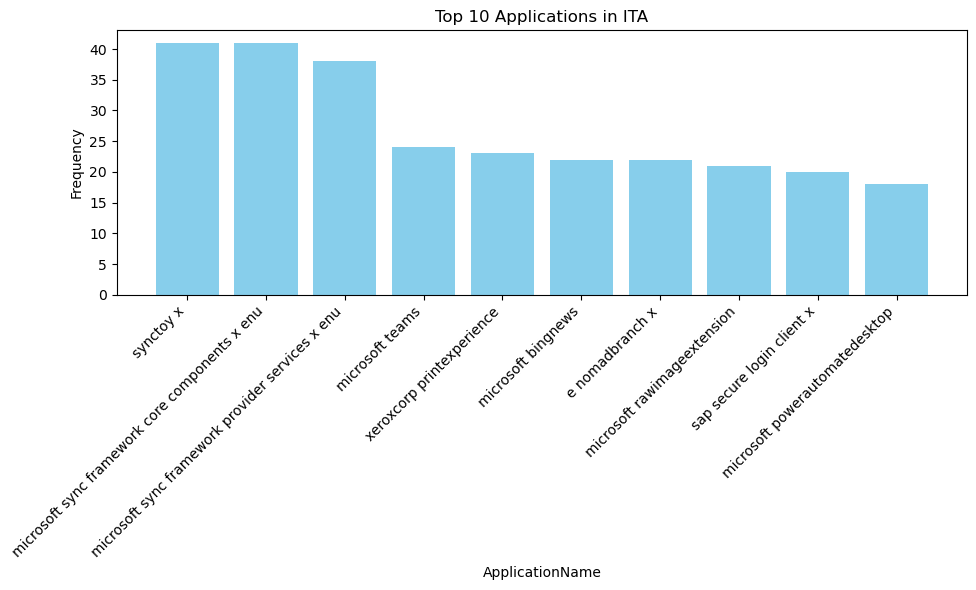

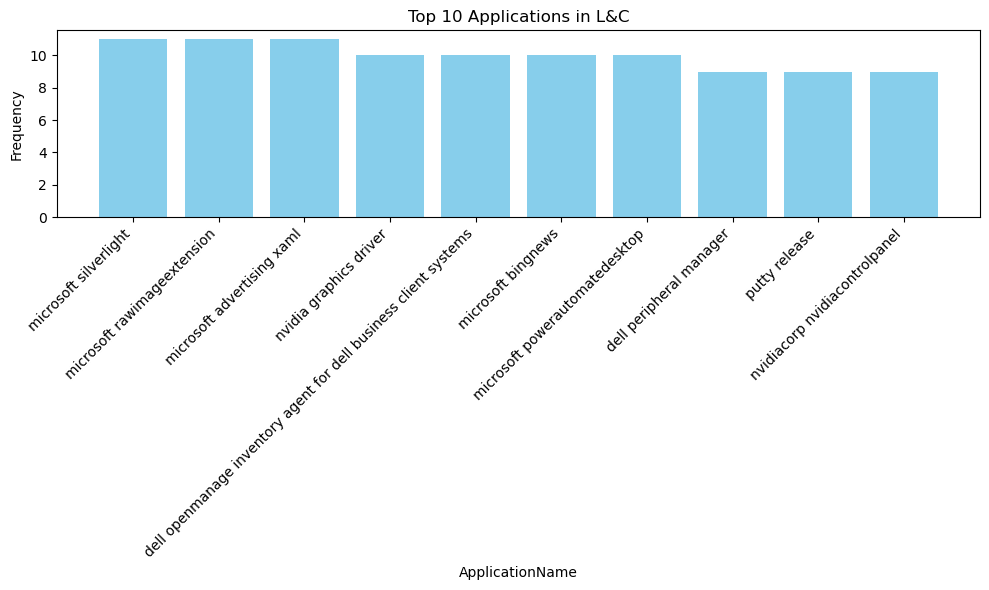

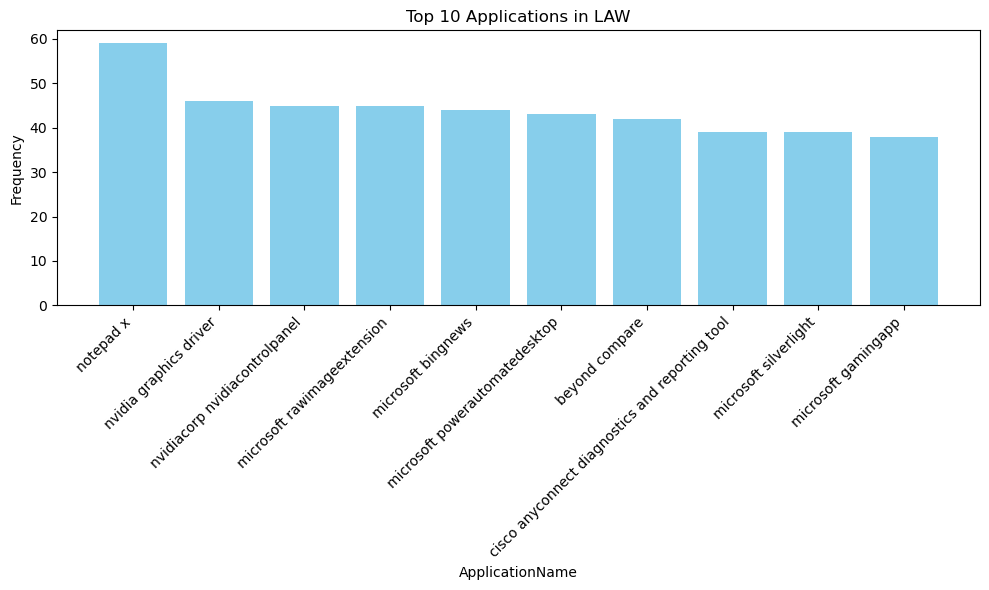

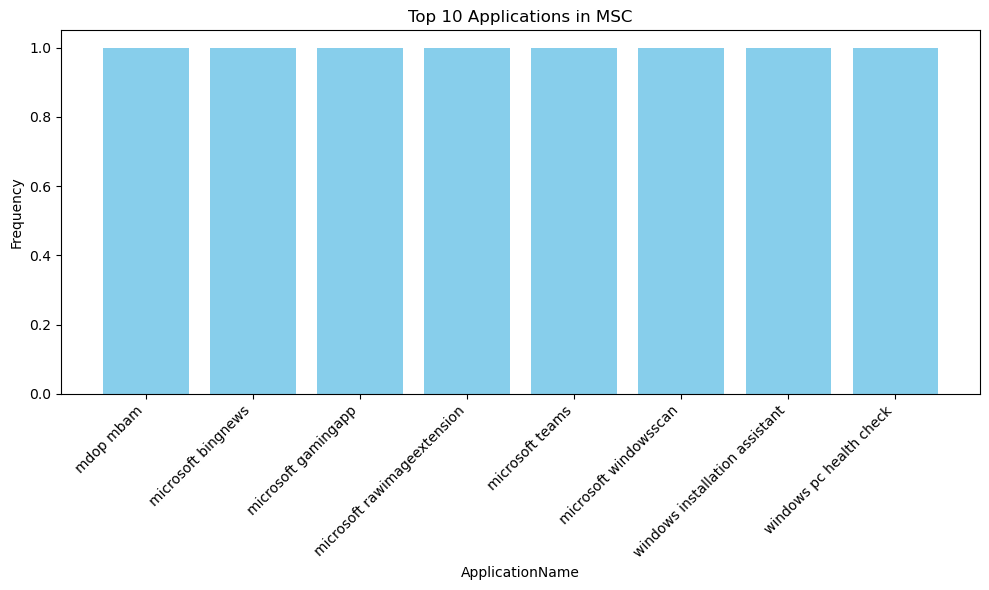

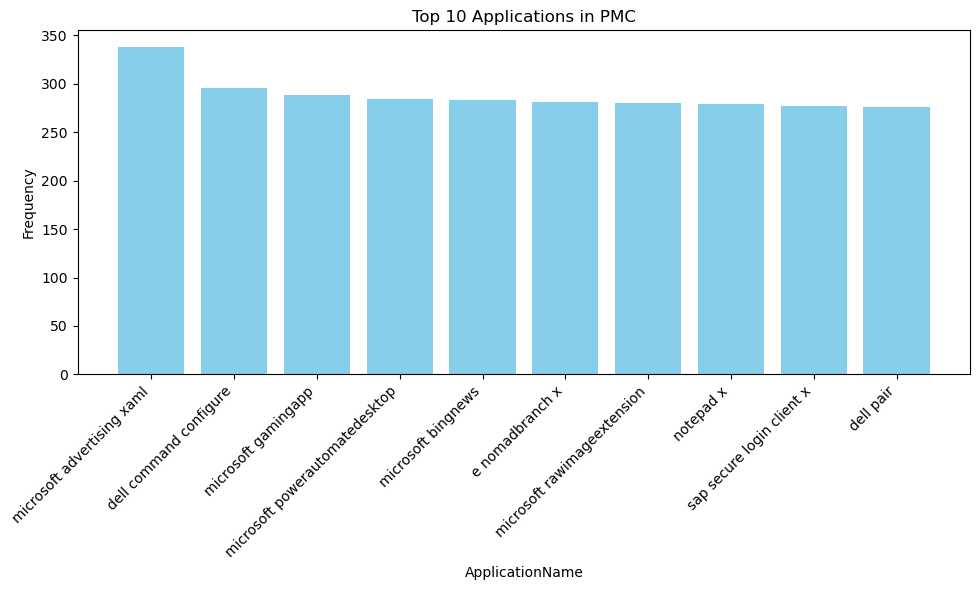

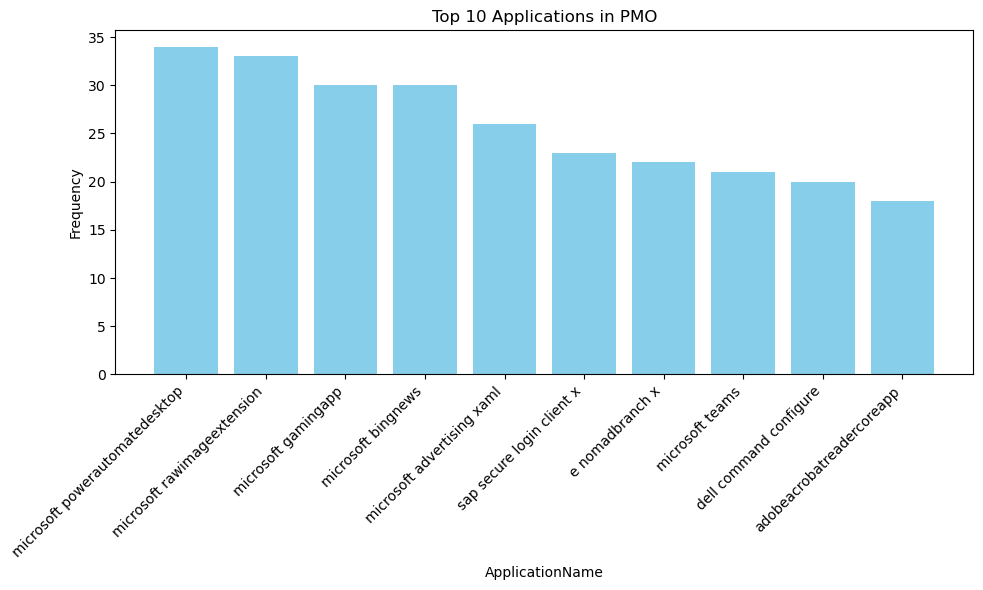

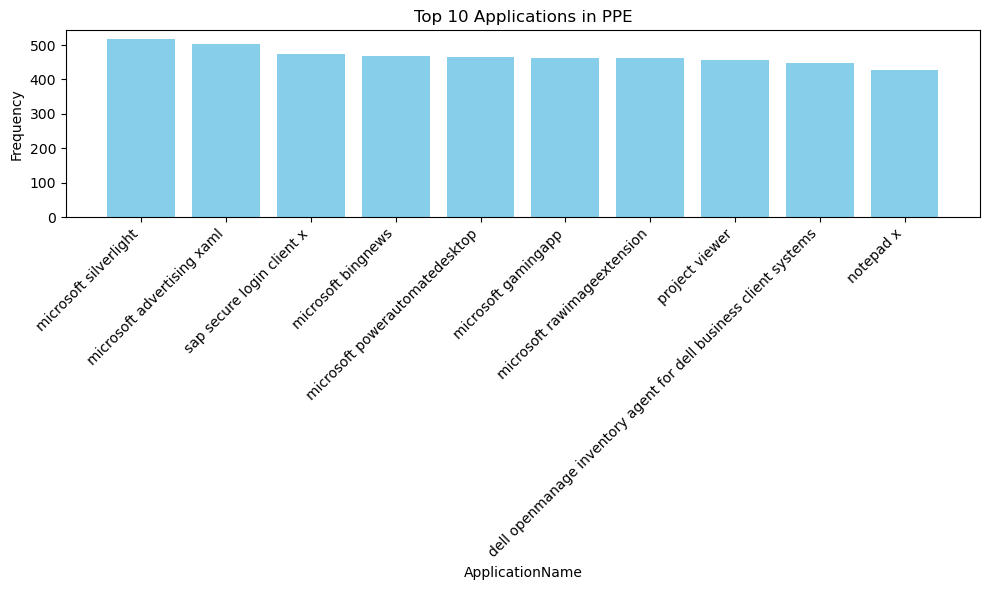

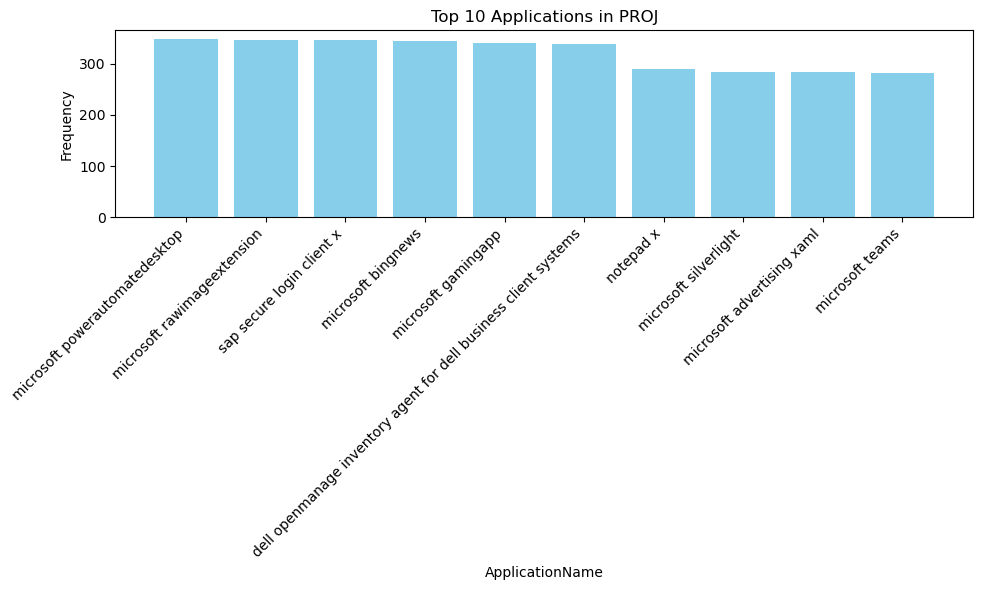

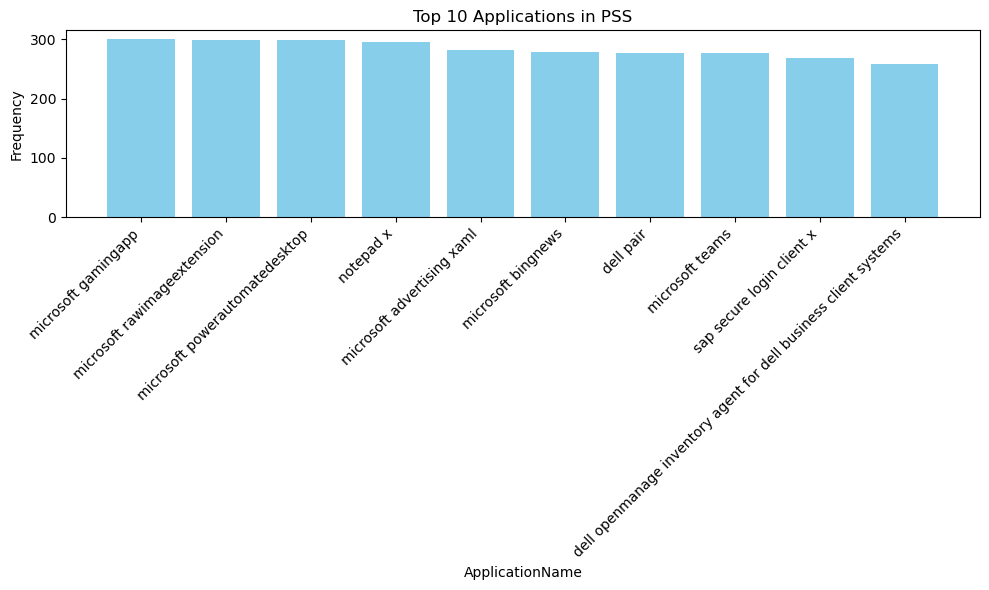

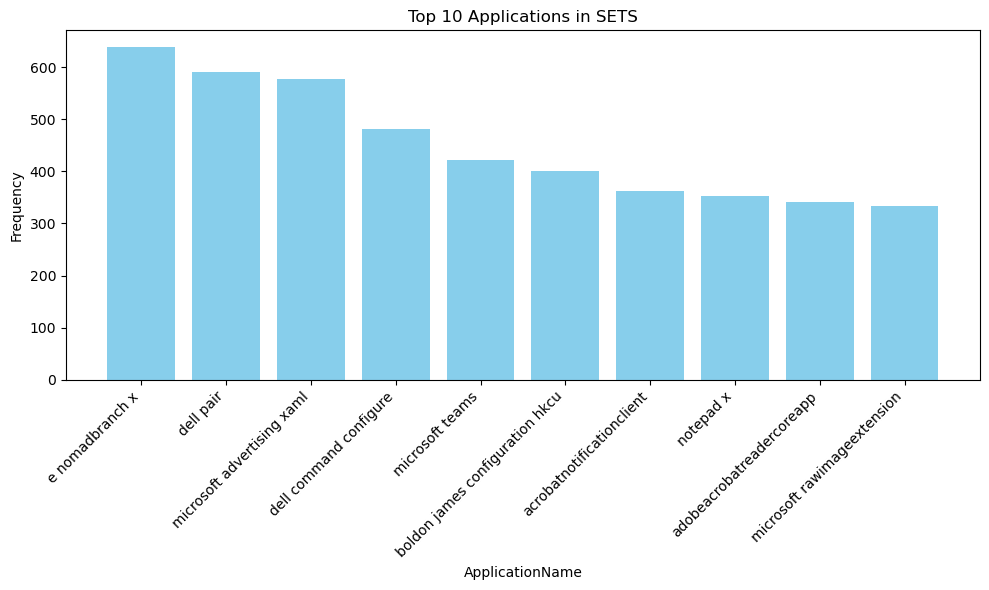

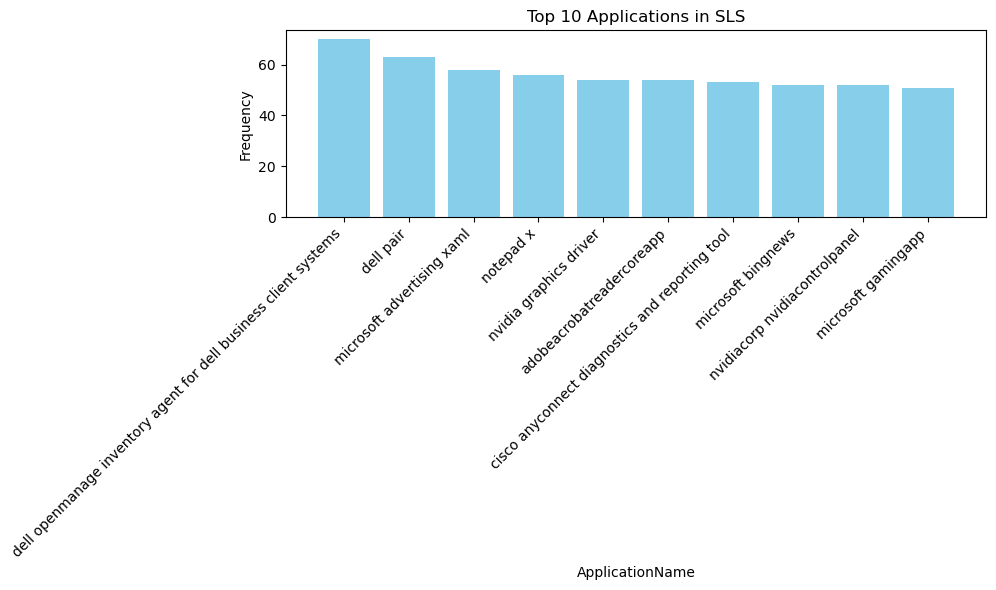

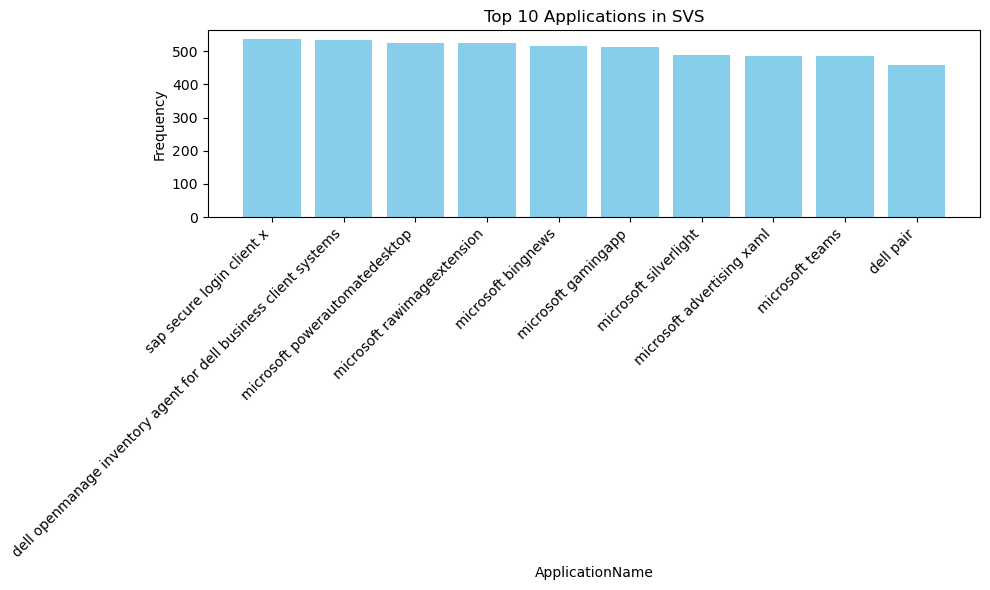

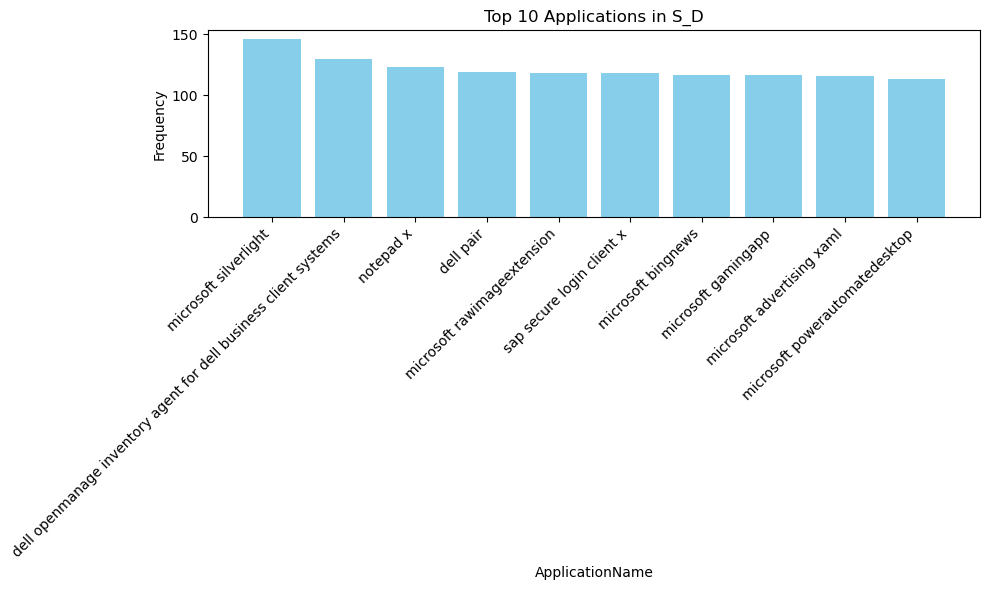

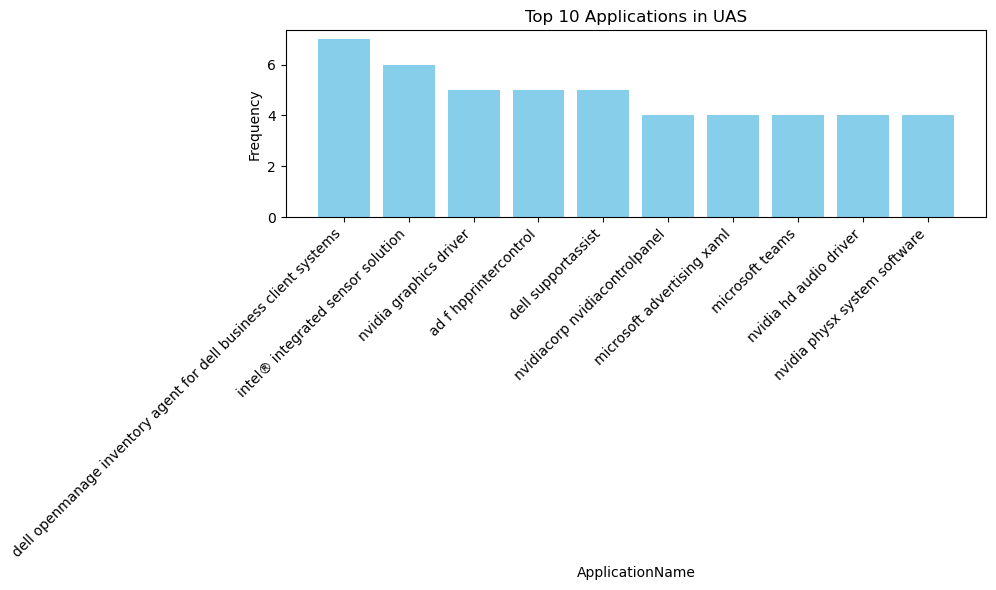

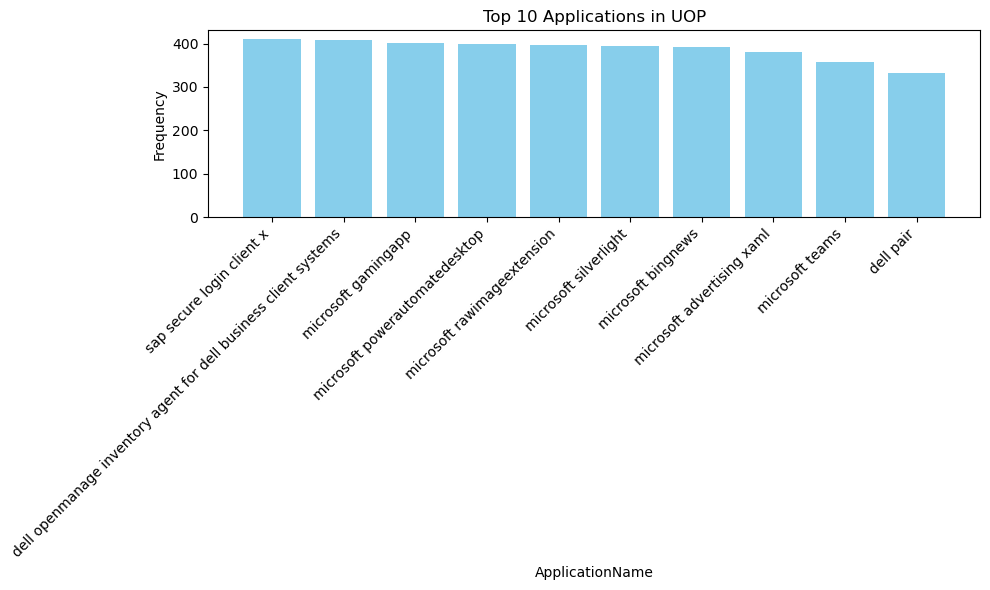

In [2]:
#Task--12

import pandas as pd
import matplotlib.pyplot as plt

# Input and output file names
input_file = "cleaned_encoded_decoded_col.csv"
output_file = "top_10_applications_SBU.csv"

# Step 1: Load the input CSV file
data = pd.read_csv(input_file)

# Preview the dataset to ensure it has required columns like 'SBU' and 'ApplicationName'
print(data.head())

# Step 2: Group by SBU and calculate application frequencies
grouped = data.groupby(['SBU', 'ApplicationName']).size().reset_index(name='Frequency')

# Step 3: Identify the top 10 applications in each SBU
top_10_apps = []

for sbu, group in grouped.groupby('SBU'):
    # Sort applications by frequency
    sorted_group = group.sort_values(by='Frequency', ascending=False)
    # Select top 10 applications
    top_apps = sorted_group.head(10)
    top_10_apps.append(top_apps)

# Combine all top applications into a single DataFrame
top_10_apps_df = pd.concat(top_10_apps)

# Step 4: Save the results to a new CSV file
top_10_apps_df.to_csv(output_file, index=False)
print(f"Top 10 applications saved to {output_file}")

# Step 5: Visualize the data
for sbu, group in top_10_apps_df.groupby('SBU'):
    plt.figure(figsize=(10, 6))
    plt.bar(group['ApplicationName'], group['Frequency'], color='skyblue')
    plt.title(f"Top 10 Applications in {sbu}")
    plt.xlabel("ApplicationName")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()